# Import Libraries

In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set rows and cols option for pandas
pd.set_option("display.max_rows", 300)
pd.set_option('display.max_columns', 500)

# Load data / check its structure / metadata

In [4]:
# Read the csv files
telecom = pd.read_csv('telecom_churn_data.csv', on_bad_lines='skip')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Identifying the shape of telecom data frame
telecom.shape

(99999, 226)

In [6]:
# Check info of leads dataset
# We will set verbose True to print the full summary
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
# Describe numberical columns
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Data Preparation - Derive new features

In [8]:
# Lets first find all the recharge columns

recharge_cols = telecom.filter(regex='total_rech_amt|total_rech_data|av_rech_amt_data').columns
recharge_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [9]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = telecom[recharge_cols].isnull().sum()/len(telecom[recharge_cols].index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

total_rech_data_6     74.846748
av_rech_amt_data_6    74.846748
total_rech_data_7     74.428744
av_rech_amt_data_7    74.428744
total_rech_data_9     74.077741
av_rech_amt_data_9    74.077741
total_rech_data_8     73.660737
av_rech_amt_data_8    73.660737
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
dtype: float64

In [10]:
# To get the high value customer we need the following
# total_rech_amt and total_rech_amt_data
# We already have the total_rech_amt, we need to derive total_rech_amt_data
# Before deriving values, lets impute the missing values for the 'good phase'

telecom['total_rech_amt_6'] = telecom['total_rech_amt_6'].replace(np.NaN,0.0)
telecom['total_rech_amt_7'] = telecom['total_rech_amt_7'].replace(np.NaN,0.0)
telecom['total_rech_amt_8'] = telecom['total_rech_amt_8'].replace(np.NaN,0.0)

telecom['total_rech_data_6'] = telecom['total_rech_data_6'].replace(np.NaN,0.0)
telecom['total_rech_data_7'] = telecom['total_rech_data_7'].replace(np.NaN,0.0)
telecom['total_rech_data_8'] = telecom['total_rech_data_8'].replace(np.NaN,0.0)

telecom['av_rech_amt_data_6'] = telecom['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_7'] = telecom['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_8'] = telecom['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [11]:
# Deriving total_rech_amt_data
telecom['total_rech_amt_data_6'] = telecom.av_rech_amt_data_6 * telecom.total_rech_data_6
telecom['total_rech_amt_data_7'] = telecom.av_rech_amt_data_7 * telecom.total_rech_data_7
telecom['total_rech_amt_data_8'] = telecom.av_rech_amt_data_8 * telecom.total_rech_data_8

In [12]:
# Deriving cumulated total_rech_amt_data for Good Phase
telecom['total_avg_rech_amt_good_phase'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_data_6 + telecom.total_rech_amt_7+ telecom.total_rech_amt_data_7)/2

# Data Preparation - Filter high-value customers

In [13]:
# Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

high_value_filter = telecom.total_avg_rech_amt_good_phase.quantile(0.7)
high_value_filter

478.0

In [14]:
# Filtering the high value customers

telecom_high_val_cust = telecom[telecom.total_avg_rech_amt_good_phase >  high_value_filter]
telecom_high_val_cust.shape

(29953, 230)

# Data Preparation - Tag churners and remove attributes of the churn phase

In [15]:
# Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

churn_attributes = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [16]:
# Check the percentage of missing values in churn_attributes
# Sort them in descending order

percentage_of_null_values = telecom_high_val_cust[churn_attributes].isnull().sum()/len(telecom_high_val_cust[churn_attributes]) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

# We see no missing values

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [17]:
# Set High value customers as churned for whom we have no activity

telecom_high_val_cust['churn'] = (telecom_high_val_cust.total_ic_mou_9 == 0) & (telecom_high_val_cust.total_og_mou_9 == 0) & (telecom_high_val_cust.vol_2g_mb_9 == 0) & (telecom_high_val_cust.vol_3g_mb_9 == 0)

In [18]:
# Check churn values

telecom_high_val_cust.churn.value_counts()

False    27520
True      2433
Name: churn, dtype: int64

In [19]:
# Convert churn to numerical column

telecom_high_val_cust.churn = telecom_high_val_cust.churn.astype(int)
telecom_high_val_cust.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [20]:
# As we have identified the churned customer, we will remove all the attributes from this phase
# i.e removing columns with '_9'

churn_attributes = telecom.filter(regex='_9').columns
churn_attributes

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [21]:
telecom_high_val_cust = telecom_high_val_cust.drop(churn_attributes, axis=1)
telecom_high_val_cust.shape

(29953, 177)

# Handling Date and single value columns

In [22]:
date_cols = telecom_high_val_cust.select_dtypes('object').columns

In [23]:
# Convert object columns to datetime

telecom_high_val_cust[date_cols] = telecom_high_val_cust[date_cols].apply(pd.to_datetime)

In [24]:
# Identifying all the columns with single values

def get_all_categorical_cols(df):
  cat_col = []
  for column in df:
    if len(df[column].value_counts()) <= 1:
      cat_col.append(column)

  return cat_col


In [25]:
single_val = get_all_categorical_cols(telecom_high_val_cust)
single_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [26]:
# Dropping all the columns with single values as it may add bias

telecom_high_val_cust = telecom_high_val_cust.drop(single_val, axis=1)

In [27]:
telecom_high_val_cust.shape

(29953, 164)

In [28]:
telecom_high_val_cust.select_dtypes('datetime64').columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [29]:
# As we cannot perform PCA with date columns
# Let us extract the day component from date

telecom_high_val_cust['day_of_last_rech_6'] = telecom_high_val_cust.date_of_last_rech_6.dt.day
telecom_high_val_cust['day_of_last_rech_7'] = telecom_high_val_cust.date_of_last_rech_7.dt.day
telecom_high_val_cust['day_of_last_rech_8'] = telecom_high_val_cust.date_of_last_rech_8.dt.day
telecom_high_val_cust['day_of_last_rech_data_6'] = telecom_high_val_cust.date_of_last_rech_data_6.dt.day
telecom_high_val_cust['day_of_last_rech_data_7'] = telecom_high_val_cust.date_of_last_rech_data_7.dt.day
telecom_high_val_cust['day_of_last_rech_data_8'] = telecom_high_val_cust.date_of_last_rech_data_8.dt.day

In [30]:
# Dropping the date cols

telecom_high_val_cust = telecom_high_val_cust.drop(telecom_high_val_cust.select_dtypes('datetime64').columns, axis=1)
telecom_high_val_cust.shape

(29953, 164)

# Univariate Analysis - Recharge columns

In [31]:
# To understand the relatioship of dependent variable with independent variable we will plot graphs using the below function
# We will plot for the months 6th, 7th and 8th respectively

def plot_box_chart(col):
    plt.figure(figsize=(18,14))
    plt.subplot(2,3,1)
    sns.boxplot(data=telecom_high_val_cust, y=col+"_6",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=telecom_high_val_cust, y=col+"_7",x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=telecom_high_val_cust, y=col+"_8",x="churn",hue="churn",
                showfliers=False)
    plt.show()

In [32]:
cols_rech_amt = telecom_high_val_cust.filter(regex='total_rech_amt|total_rech_amt_data|max_rech_amt|total_rech_num|max_rech_data|last_day_rch_amt').columns
cols_rech_amt

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8'],
      dtype='object')

In [33]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = telecom_high_val_cust[cols_rech_amt].isnull().sum()/len(telecom_high_val_cust[cols_rech_amt].index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

# We will drop columns with high missing values after analysing them

max_rech_data_8          46.799987
max_rech_data_6          44.112443
max_rech_data_7          43.117551
total_rech_num_6          0.000000
total_rech_num_7          0.000000
total_rech_amt_data_7     0.000000
total_rech_amt_data_6     0.000000
last_day_rch_amt_8        0.000000
last_day_rch_amt_7        0.000000
last_day_rch_amt_6        0.000000
max_rech_amt_8            0.000000
max_rech_amt_7            0.000000
max_rech_amt_6            0.000000
total_rech_amt_8          0.000000
total_rech_amt_7          0.000000
total_rech_amt_6          0.000000
total_rech_num_8          0.000000
total_rech_amt_data_8     0.000000
dtype: float64

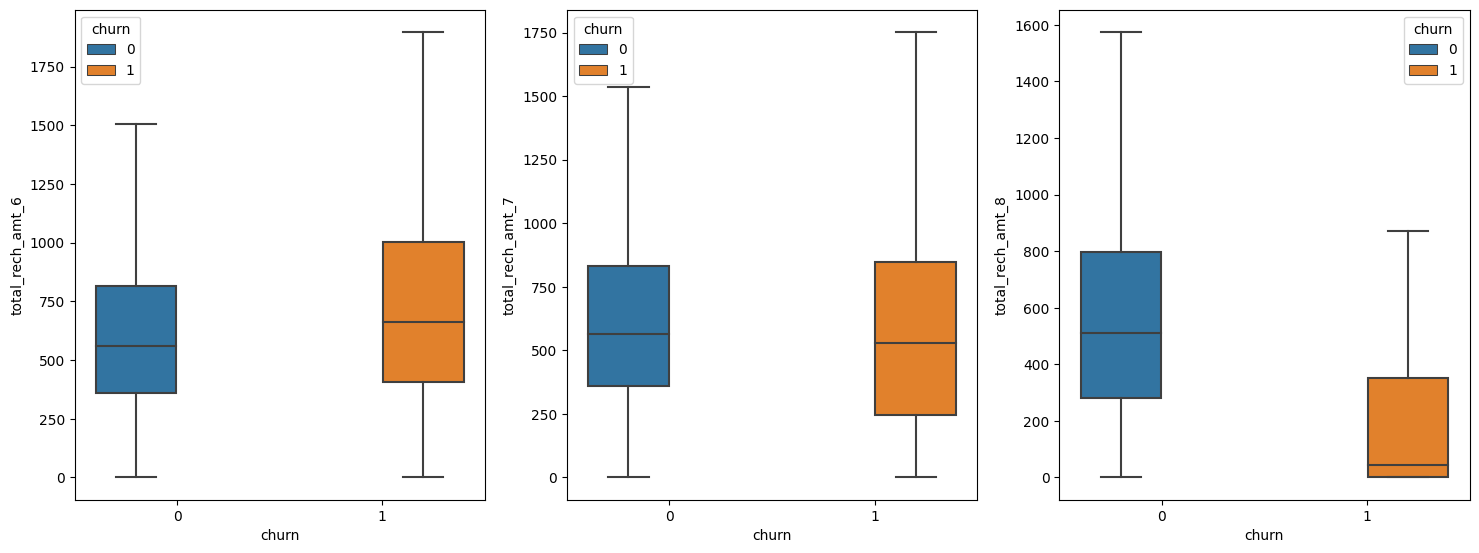

In [34]:
# First targetting all the rech related attributes
# Ploting for total_rech_amt:
plot_box_chart('total_rech_amt')

# Outcome - We can see that the total recharge amount has declined in the Action phase

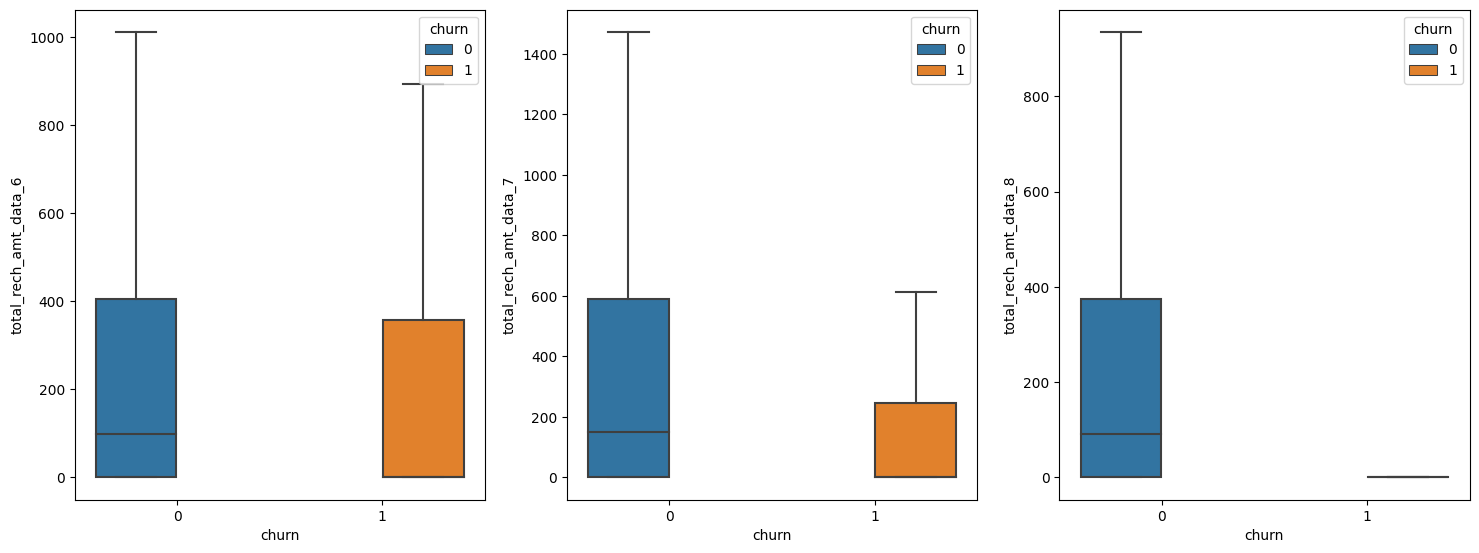

In [35]:
# Ploting for total_rech_amt_data:
plot_box_chart('total_rech_amt_data')

# Outcome - We can see that the total recharge amount data has declined in the Action phase
# we also see that there is a gradual decline in the total recharge amount data for churned customers which may indicate poor data services.

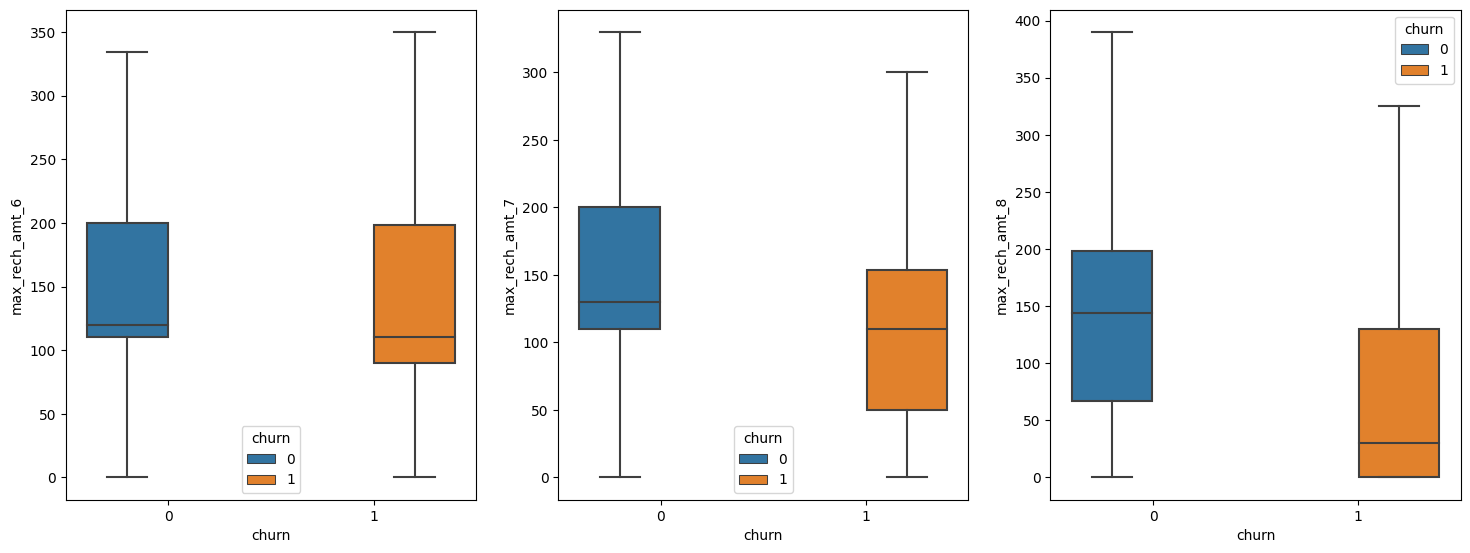

In [36]:
# Ploting for max_rech_amt:
plot_box_chart('max_rech_amt')

# Outcome - We can see that the Max recharge amount has declined in the Action phase

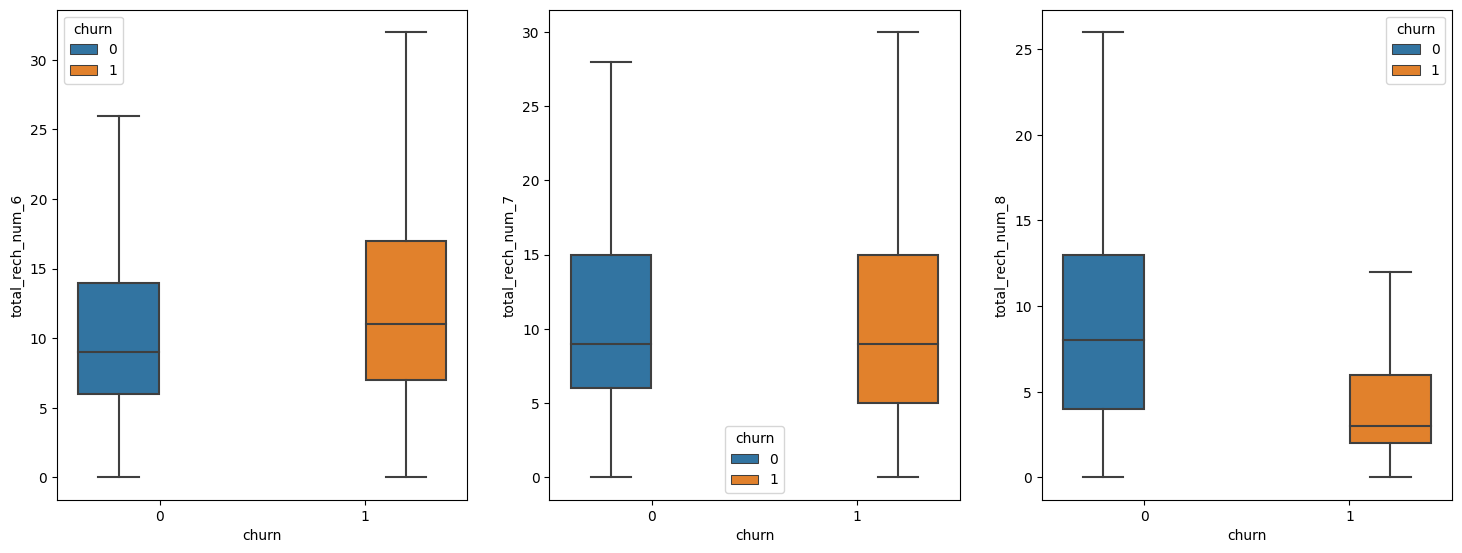

In [37]:
# Ploting for total_rech_num:
plot_box_chart('total_rech_num')

# Outcome - We can see that the Total recharge number has declined in the Action phase

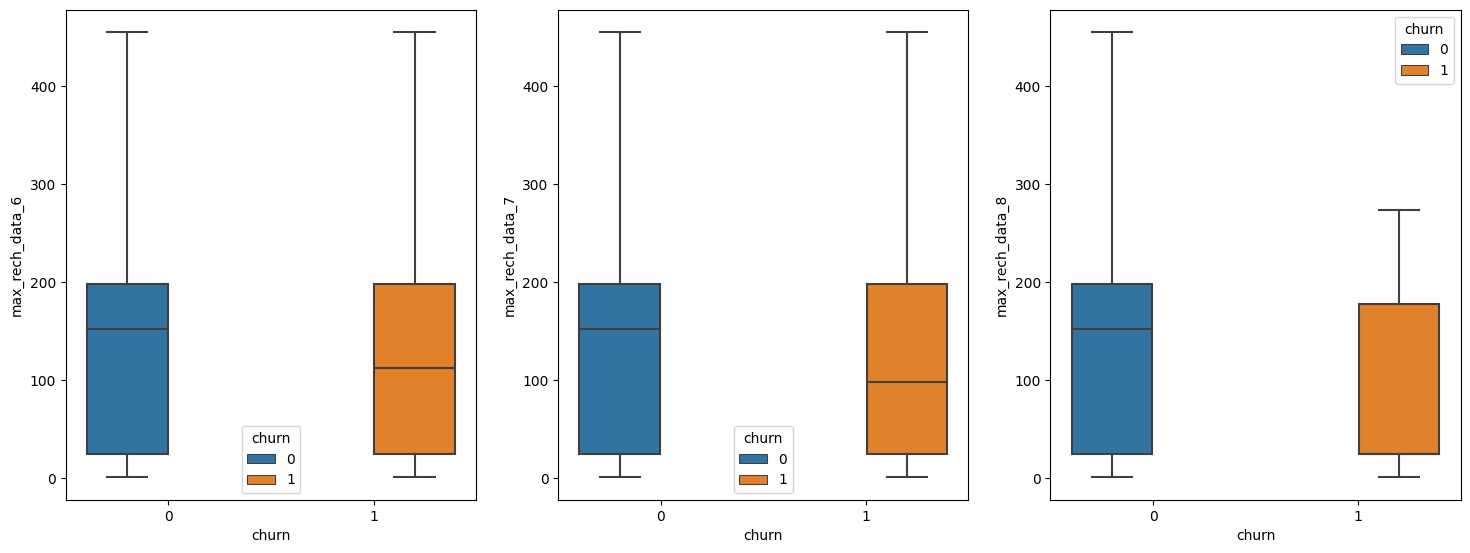

In [38]:
# Ploting for max_rech_data:
plot_box_chart('max_rech_data')

# Outcome - We can see that the Max recharge data has declined in the Action phase

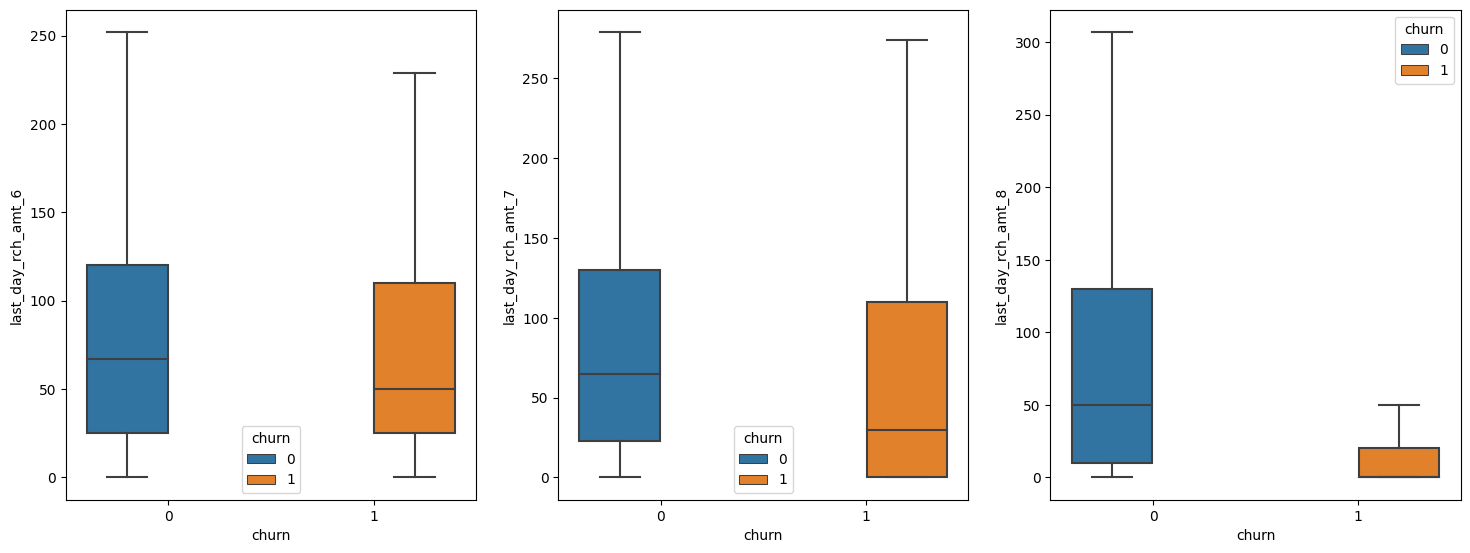

In [39]:
# Ploting for last_day_rch_amt:
plot_box_chart('last_day_rch_amt')

# Outcome - We can see that the Last day recharge amount has declined in the Action phase

In [40]:
# Get all columns with percentage of missing values greater than 40
# Print total number of columns with missing values greater than 40

null_greater_than_40 =  percentage_of_null_values[percentage_of_null_values > 40]
print(null_greater_than_40)
print('='*50)
print('Total count of columns - ', len(null_greater_than_40))

max_rech_data_8    46.799987
max_rech_data_6    44.112443
max_rech_data_7    43.117551
dtype: float64
Total count of columns -  3


In [41]:
#Dropping column with missing values greater than 40
telecom_high_val_cust.drop(null_greater_than_40.index.tolist(), inplace=True, axis=1)

# Univariate Analysis - 2g/3g columns

In [42]:
# Now let us target 2g and 3g relaed attributes

cols_2g_3g = telecom_high_val_cust.filter(regex='2g|3g').columns
cols_2g_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [43]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = telecom_high_val_cust[cols_2g_3g].isnull().sum()/len(telecom_high_val_cust[cols_2g_3g].index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

arpu_2g_8          46.799987
count_rech_2g_8    46.799987
arpu_3g_8          46.799987
count_rech_3g_8    46.799987
arpu_3g_6          44.112443
arpu_2g_6          44.112443
count_rech_2g_6    44.112443
count_rech_3g_6    44.112443
arpu_3g_7          43.117551
count_rech_3g_7    43.117551
arpu_2g_7          43.117551
count_rech_2g_7    43.117551
vol_2g_mb_7         0.000000
sachet_2g_8         0.000000
jun_vbc_3g          0.000000
jul_vbc_3g          0.000000
aug_vbc_3g          0.000000
sachet_3g_8         0.000000
sachet_3g_7         0.000000
sachet_3g_6         0.000000
monthly_3g_8        0.000000
monthly_3g_7        0.000000
monthly_3g_6        0.000000
monthly_2g_8        0.000000
sachet_2g_7         0.000000
sachet_2g_6         0.000000
vol_2g_mb_8         0.000000
monthly_2g_7        0.000000
monthly_2g_6        0.000000
vol_2g_mb_6         0.000000
vol_3g_mb_8         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_6         0.000000
sep_vbc_3g          0.000000
dtype: float64

In [44]:
# Get all columns with percentage of missing values greater than 40
# Print total number of columns with missing values greater than 40

null_greater_than_40 =  percentage_of_null_values[percentage_of_null_values > 40]
print(null_greater_than_40)
print('='*50)
print('Total count of columns - ', len(null_greater_than_40))

arpu_2g_8          46.799987
count_rech_2g_8    46.799987
arpu_3g_8          46.799987
count_rech_3g_8    46.799987
arpu_3g_6          44.112443
arpu_2g_6          44.112443
count_rech_2g_6    44.112443
count_rech_3g_6    44.112443
arpu_3g_7          43.117551
count_rech_3g_7    43.117551
arpu_2g_7          43.117551
count_rech_2g_7    43.117551
dtype: float64
Total count of columns -  12


In [45]:
#Dropping column with missing values greater than 40
telecom_high_val_cust.drop(null_greater_than_40.index.tolist(), inplace=True, axis=1)

In [46]:
telecom_high_val_cust.shape

(29953, 149)

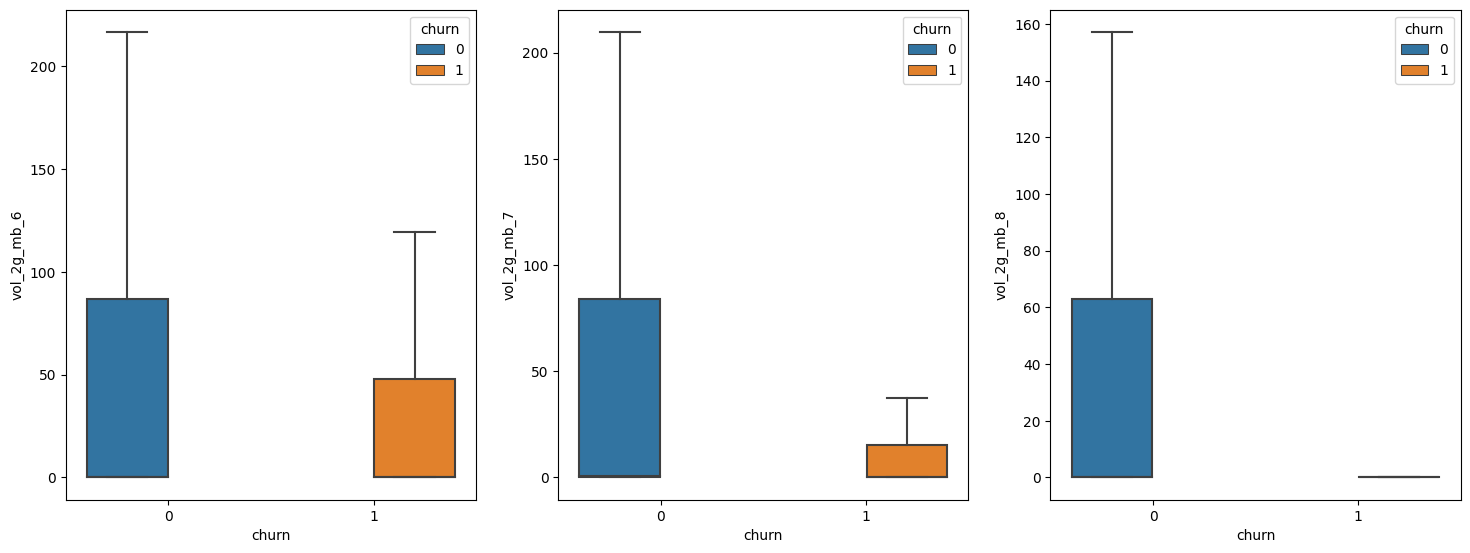

In [47]:
# Ploting for vol_2g_mb:
plot_box_chart('vol_2g_mb')

# Outcome - We can see that the 2g data volume has declined in the Action phase
# We can also see a gradual decline in 2g volume, which may indicate poor data services.

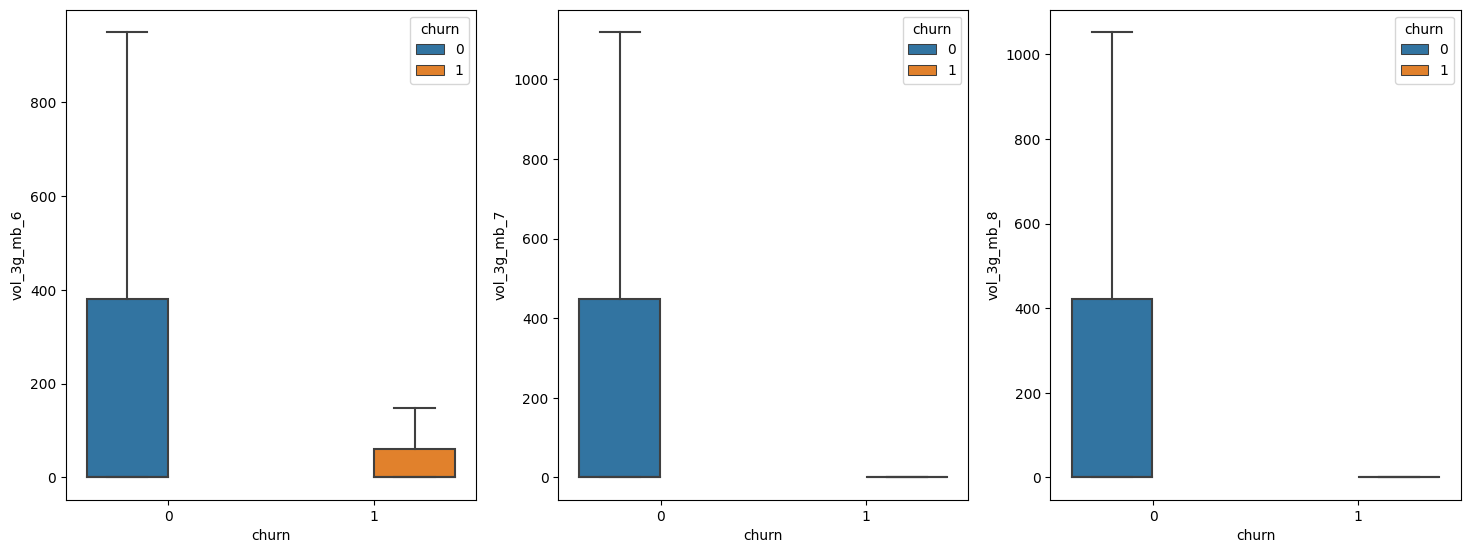

In [48]:
# Ploting for vol_3g_mb:
plot_box_chart('vol_3g_mb')

# Outcome - We can see that the 3g data volume has been on a declineing trend for churned customer, which may indicate poor 3g services.

In [49]:
# To understand the relatioship of dependent variable with independent variable we will plot graphs using the below function
# We will plot for the months 6th, 7th and 8th respectively

def plot_bar_chart(col):
  cols = [ col+'_6', col+'_7', col+'_8']
  category_wise = telecom_high_val_cust.groupby('churn')[cols].mean()
  category_wise.rename(index={0: 'Un-Churned'}, inplace=True)
  category_wise.rename(index={1: 'Churned'}, inplace=True)
  category_wise.plot(kind='bar', figsize=(10,8), fontsize=15)
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17)
  plt.show()

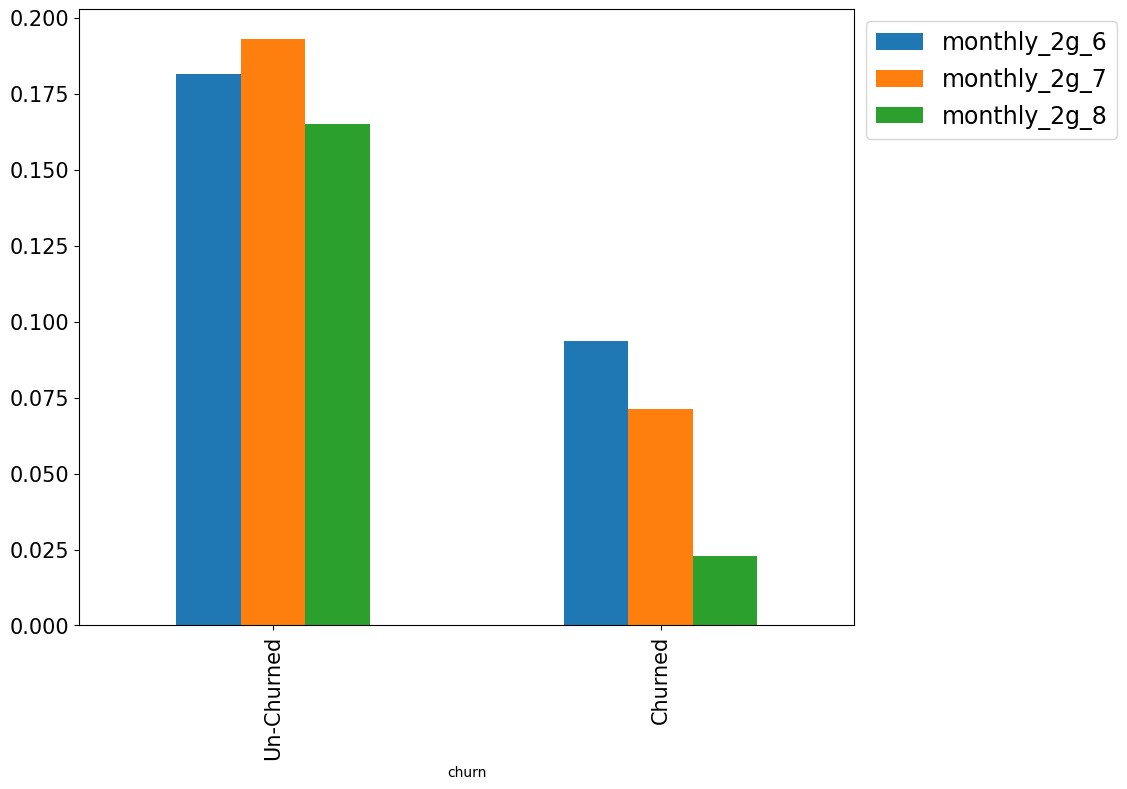

In [50]:
plot_bar_chart('monthly_2g')

# Outcome- As we can see that the churned customers has lower 2g monthly pack than un-churned

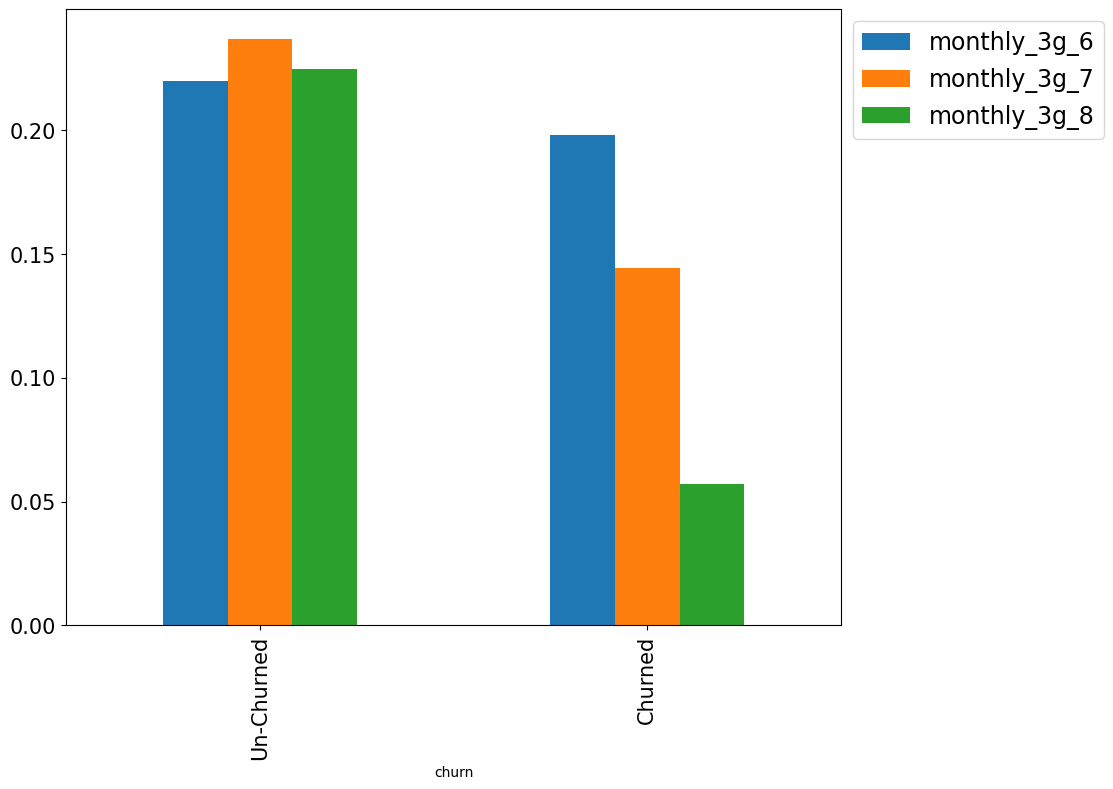

In [51]:
plot_bar_chart('monthly_3g')

# Outcome- As we can see that the churned customers has lower 2g monthly pack than un-churned

# Univariate Analysis - Volumne based cost

In [52]:
# Dropping column Volumne base cost from churned phase

telecom_high_val_cust.drop(['sep_vbc_3g'], inplace=True, axis=1)

In [53]:
# To understand the relatioship of dependent variable with independent variable we will plot graphs using the below function
# We will plot for the months 6th, 7th and 8th respectively

def plot_box_chart_month_name(col):
    plt.figure(figsize=(18,14))
    plt.subplot(2,3,1)
    sns.boxplot(data=telecom_high_val_cust, y="jun_"+col,x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=telecom_high_val_cust, y="jul_"+col,x="churn",hue="churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=telecom_high_val_cust, y="aug_"+col,x="churn",hue="churn",
                showfliers=False)
    plt.show()

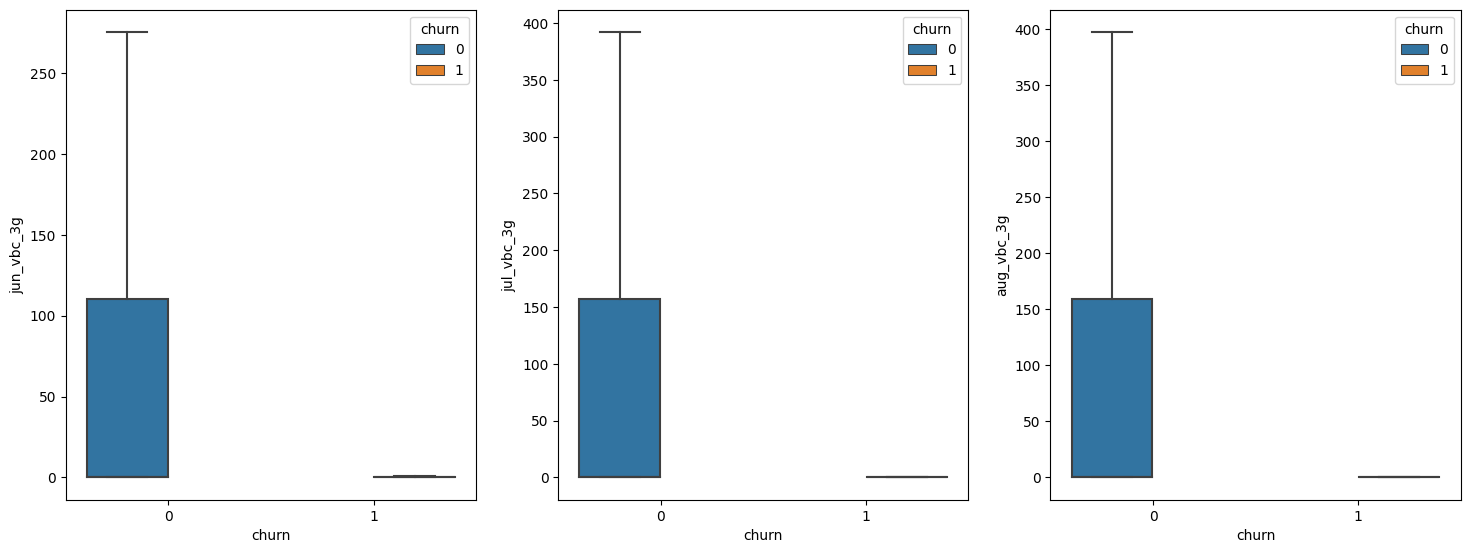

In [54]:
plot_box_chart_month_name('vbc_3g')

In [55]:
# To understand the relatioship of dependent variable with independent variable we will plot graphs using the below function
# We will plot for the months 6th, 7th and 8th respectively

def plot_bar_chart_Month_name(col):
  cols = ['jun_'+col, 'jul_'+col, 'aug_'+col]
  category_wise = telecom_high_val_cust.groupby('churn')[cols].mean()
  category_wise.rename(index={0: 'Un-Churned'}, inplace=True)
  category_wise.rename(index={1: 'Churned'}, inplace=True)
  category_wise.plot(kind='bar', figsize=(10,8), fontsize=15)
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17)
  plt.show()

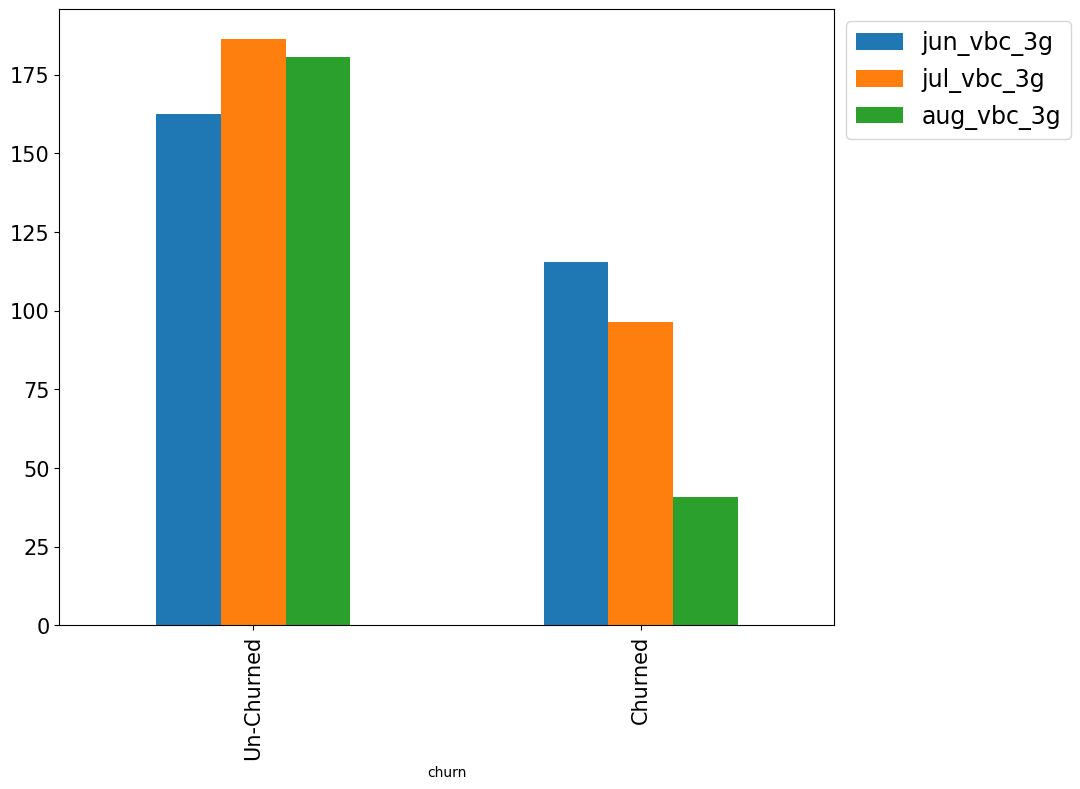

In [56]:
plot_bar_chart_Month_name('vbc_3g')

# Outcome - We can see that the volume based cost for churned customer is declining

# Univariate Analysis - Sachet columns



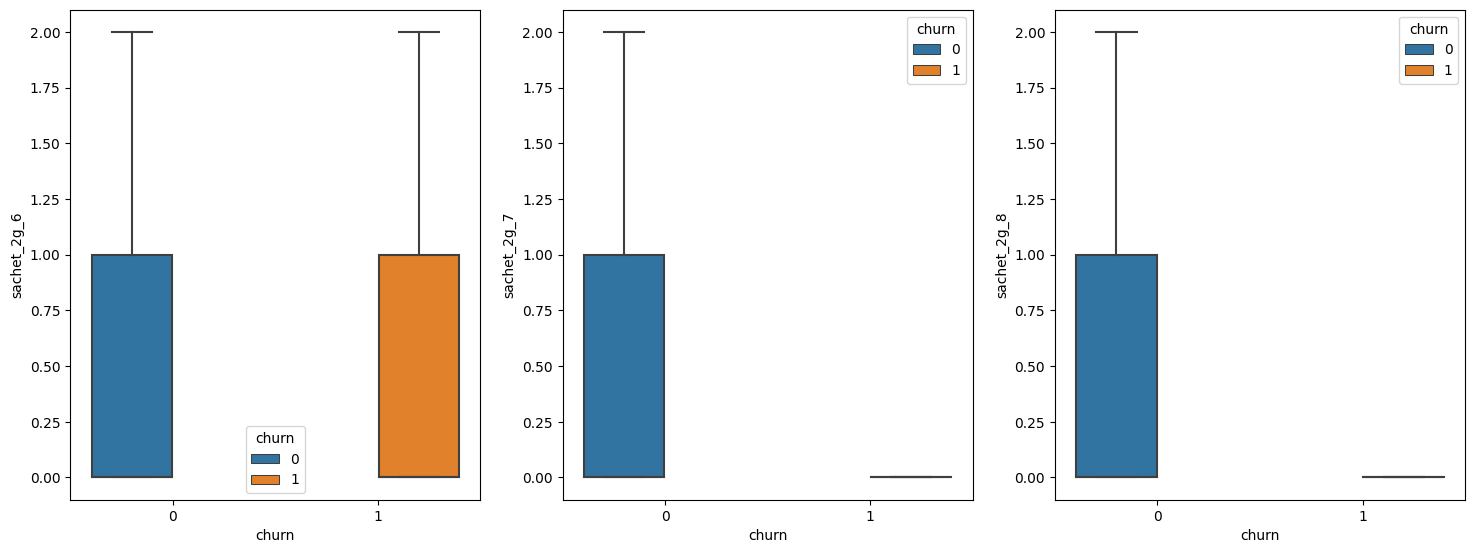

In [57]:
# Ploting for sachet_2g:
plot_box_chart('sachet_2g')

# Outcome - We can see that the sachet 2g has declined in the 7th and 8th month

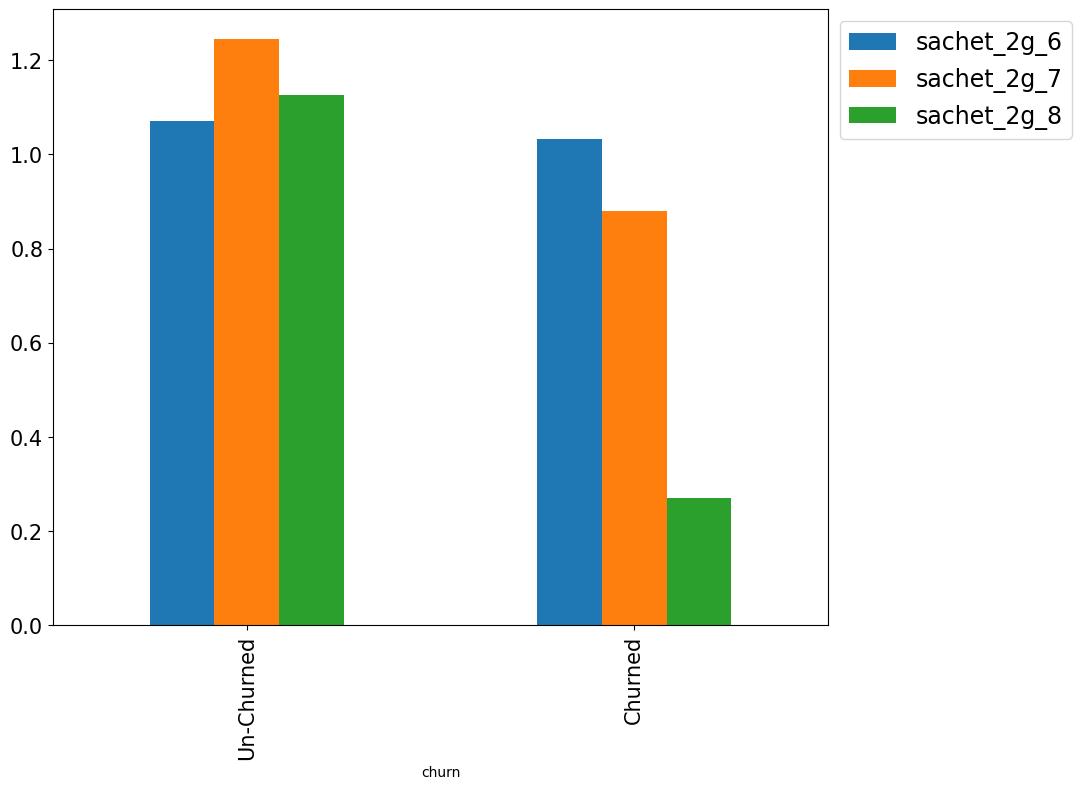

In [58]:
plot_bar_chart('sachet_2g')

# Outcome- As we can see that for the churned customers the sachet use has declined in the churned phase

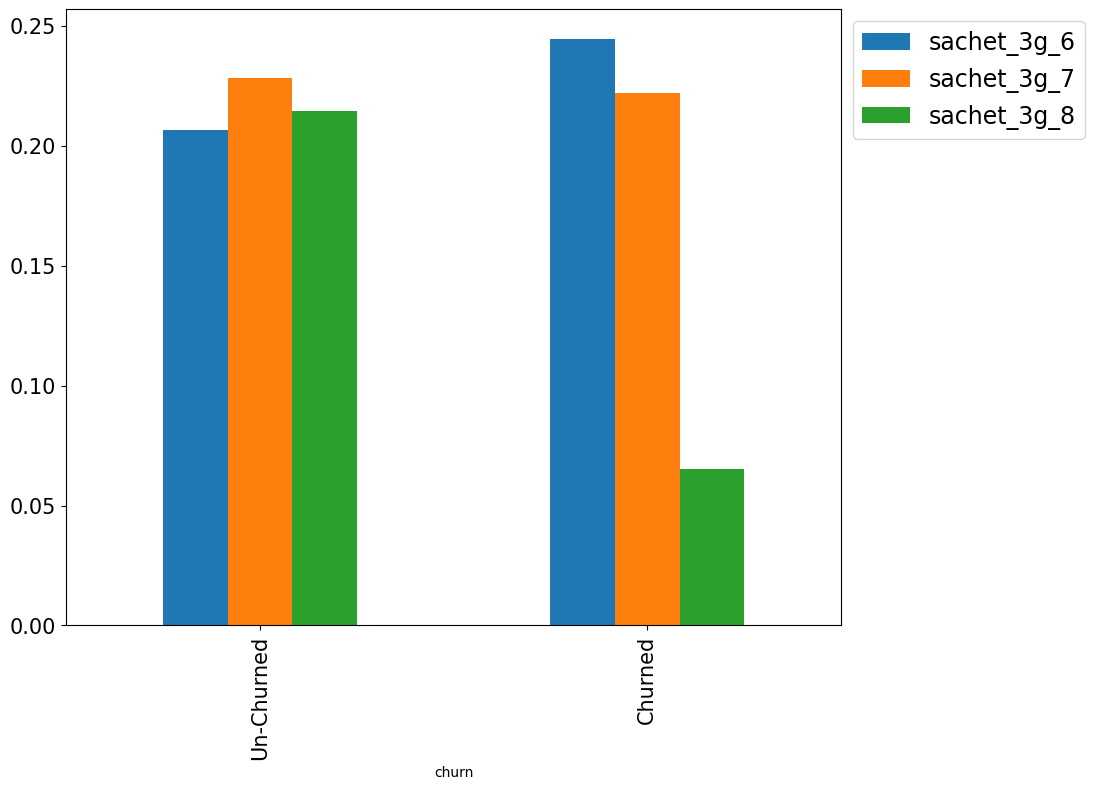

In [59]:
plot_bar_chart('sachet_3g')

# Outcome- As we can see that for the churned customers the sachet use has declined in the churned phase

#



# Univariate Analysis - Average Revenue Per User

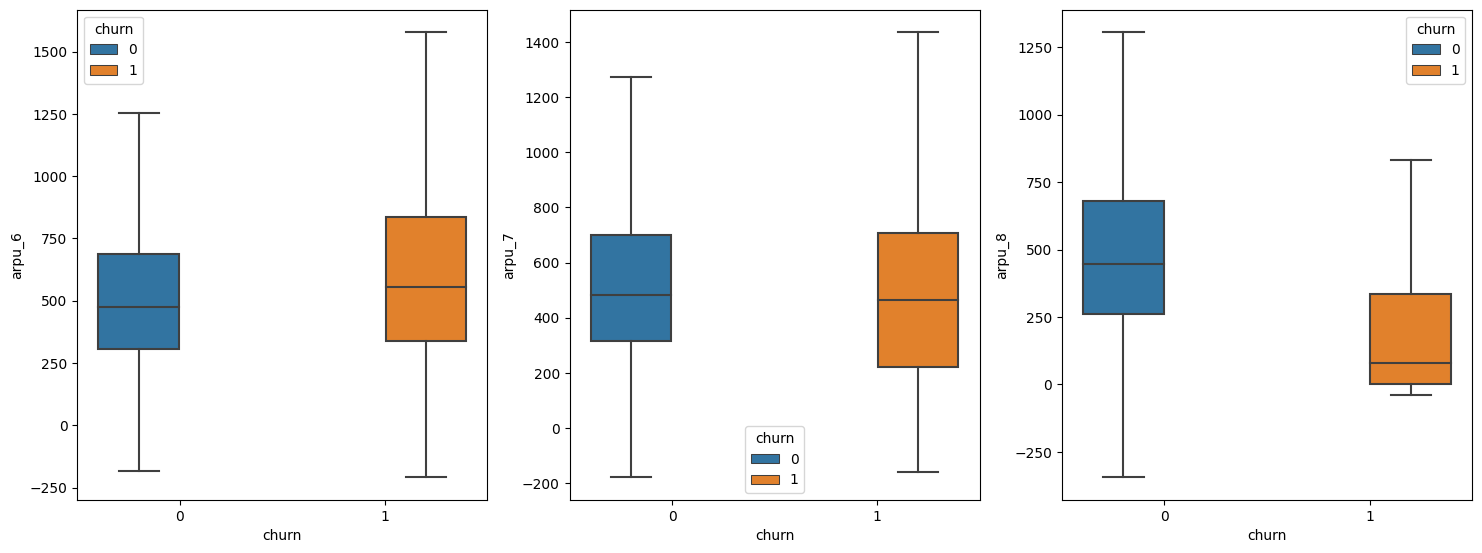

In [60]:
# Plotting arpu
plot_box_chart('arpu')

# Outcome - As we can see the ARPU in the action phase has declined for the churned users

# Multivariate Analysis - Minutes of usage

In [61]:
mou_cols = telecom_high_val_cust.filter(regex='mou').columns
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [62]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = telecom_high_val_cust[mou_cols].isnull().sum()/len(telecom_high_val_cust[mou_cols].index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

# We will drop columns with high missing values after analysing them

isd_ic_mou_8        3.912797
loc_ic_t2t_mou_8    3.912797
loc_ic_t2m_mou_8    3.912797
std_og_t2t_mou_8    3.912797
loc_og_t2c_mou_8    3.912797
loc_ic_t2f_mou_8    3.912797
loc_og_t2f_mou_8    3.912797
loc_ic_mou_8        3.912797
std_og_mou_8        3.912797
loc_og_t2m_mou_8    3.912797
std_ic_t2t_mou_8    3.912797
spl_og_mou_8        3.912797
loc_og_t2t_mou_8    3.912797
std_ic_t2m_mou_8    3.912797
std_og_t2m_mou_8    3.912797
roam_og_mou_8       3.912797
std_ic_t2f_mou_8    3.912797
roam_ic_mou_8       3.912797
std_ic_mou_8        3.912797
isd_og_mou_8        3.912797
offnet_mou_8        3.912797
spl_ic_mou_8        3.912797
std_og_t2f_mou_8    3.912797
onnet_mou_8         3.912797
loc_og_mou_8        3.912797
spl_og_mou_6        1.809502
loc_ic_t2t_mou_6    1.809502
std_ic_t2t_mou_6    1.809502
loc_ic_t2m_mou_6    1.809502
loc_ic_t2f_mou_6    1.809502
loc_ic_mou_6        1.809502
std_ic_t2m_mou_6    1.809502
std_ic_t2f_mou_6    1.809502
std_ic_mou_6        1.809502
spl_ic_mou_6  

In [63]:
# As missing value percentage is not too high, we can impute the missing values by 0

telecom_high_val_cust[mou_cols] = telecom_high_val_cust[mou_cols].replace(np.NaN,0.0)

In [64]:
from copy import copy
def generate_heat_map(cols):
  mou_cols = telecom_high_val_cust.filter(regex='mou'+cols).columns
  corr = telecom_high_val_cust[mou_cols].corr()
  plt.figure(figsize=(12,8))
  my_cmap = copy(plt.cm.YlGnBu)
  my_cmap.set_over("white")
  my_cmap.set_under("white")
  sns.heatmap(corr, cmap=my_cmap, annot_kws={"fontsize":7}, vmin=0.85, vmax=0.99, linewidths=1.0, linecolor="grey")
  plt.show()

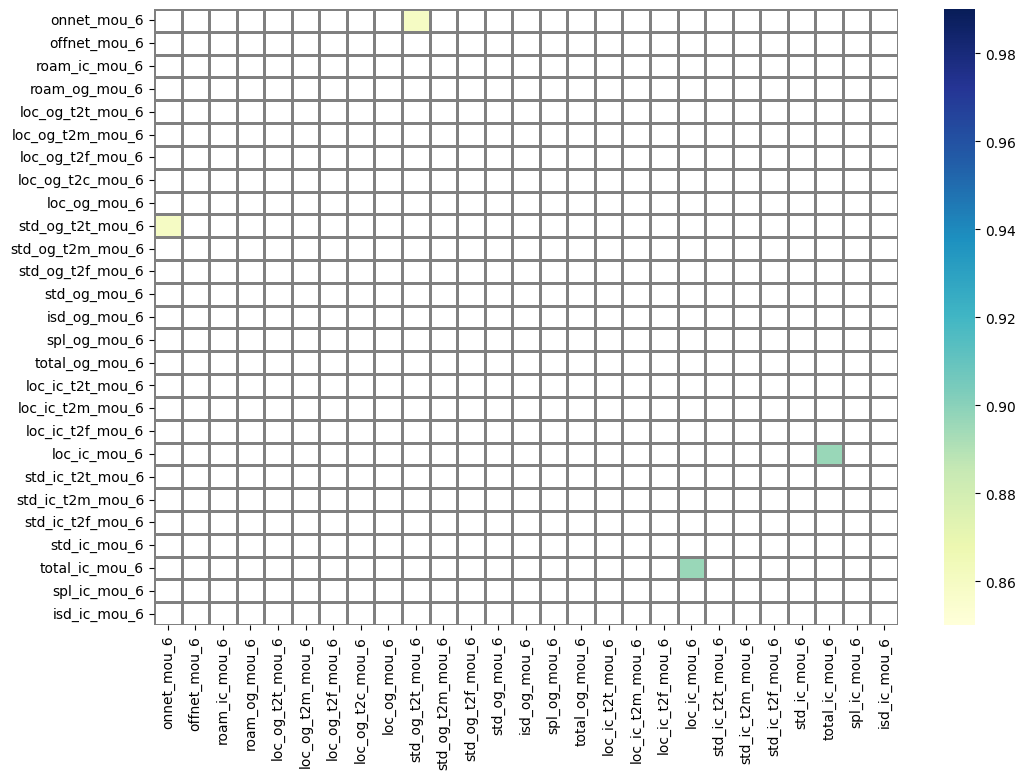

In [65]:
generate_heat_map('_6')



# Outcome - We see some features have high multi-collinearity
# dropping some columns with high multi-collinearity

collinear_cols = ['loc_ic_mou_6', 'std_og_t2t_mou_6']
telecom_high_val_cust.drop(collinear_cols, inplace=True, axis=1)

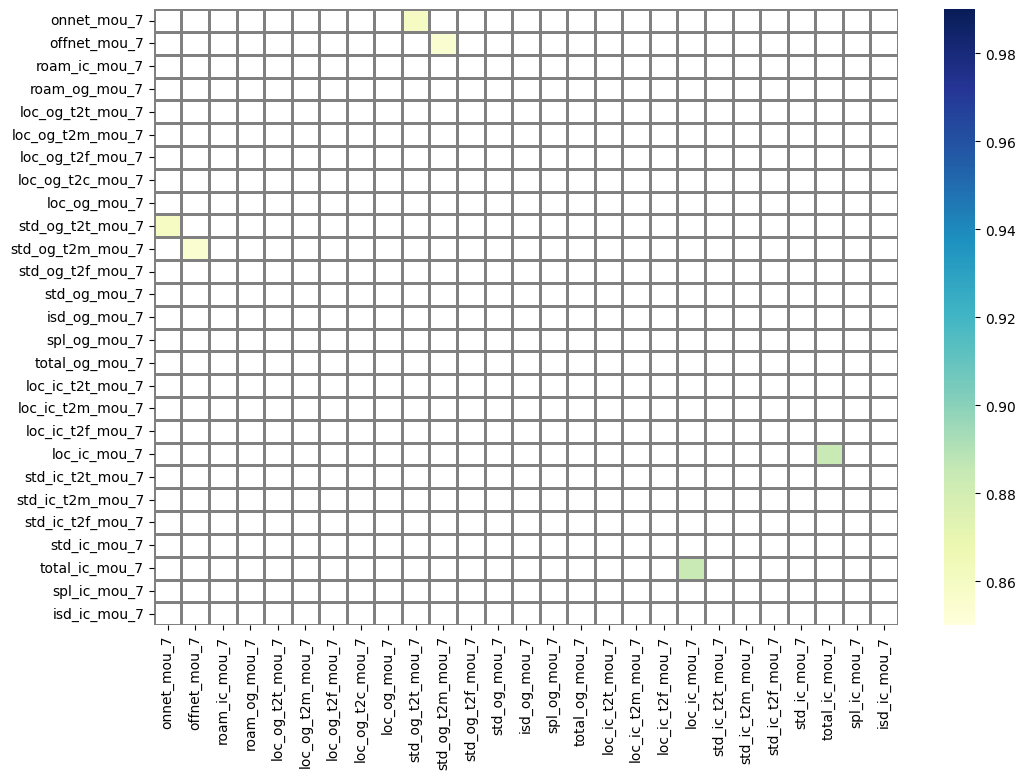

In [66]:
generate_heat_map('_7')

# Outcome - We see some features have high multi-collinearity
# dropping some columns with high multi-collinearity

collinear_cols = ['loc_ic_mou_7', 'std_og_t2t_mou_7']
telecom_high_val_cust.drop(collinear_cols, inplace=True, axis=1)

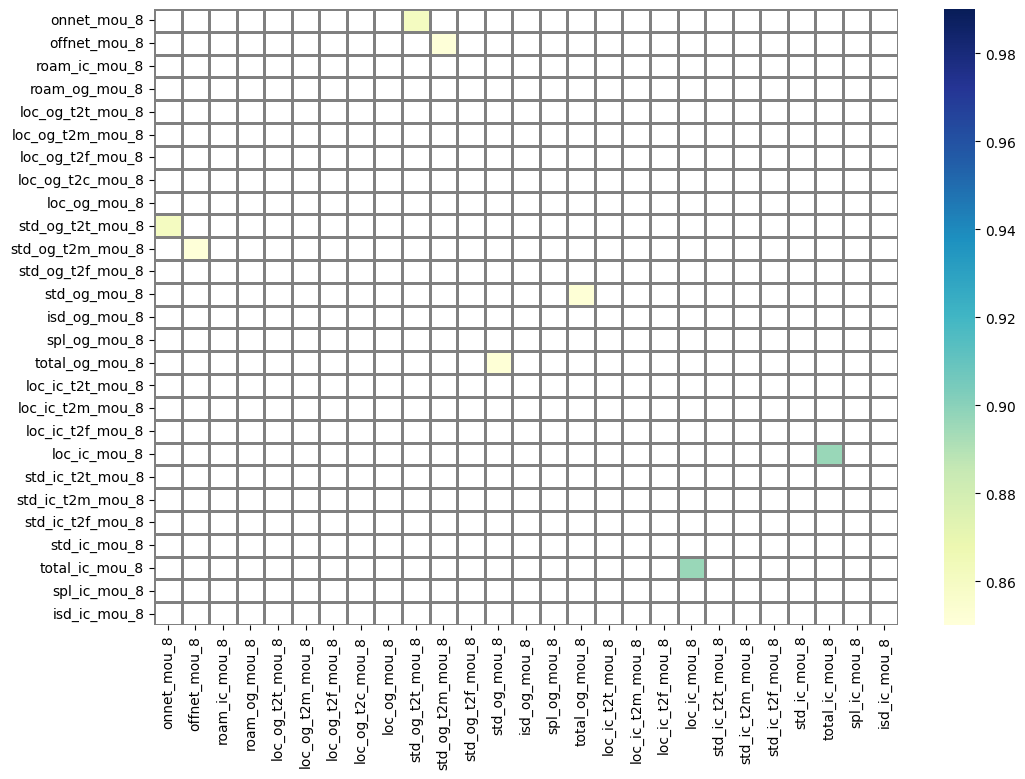

In [67]:
generate_heat_map('_8')

# Outcome - We see some features have high multi-collinearity
# dropping some columns with high multi-collinearity

collinear_cols = ['loc_ic_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8']
telecom_high_val_cust.drop(collinear_cols, inplace=True, axis=1)

# Univariate Analysis - Offnet/Onnet

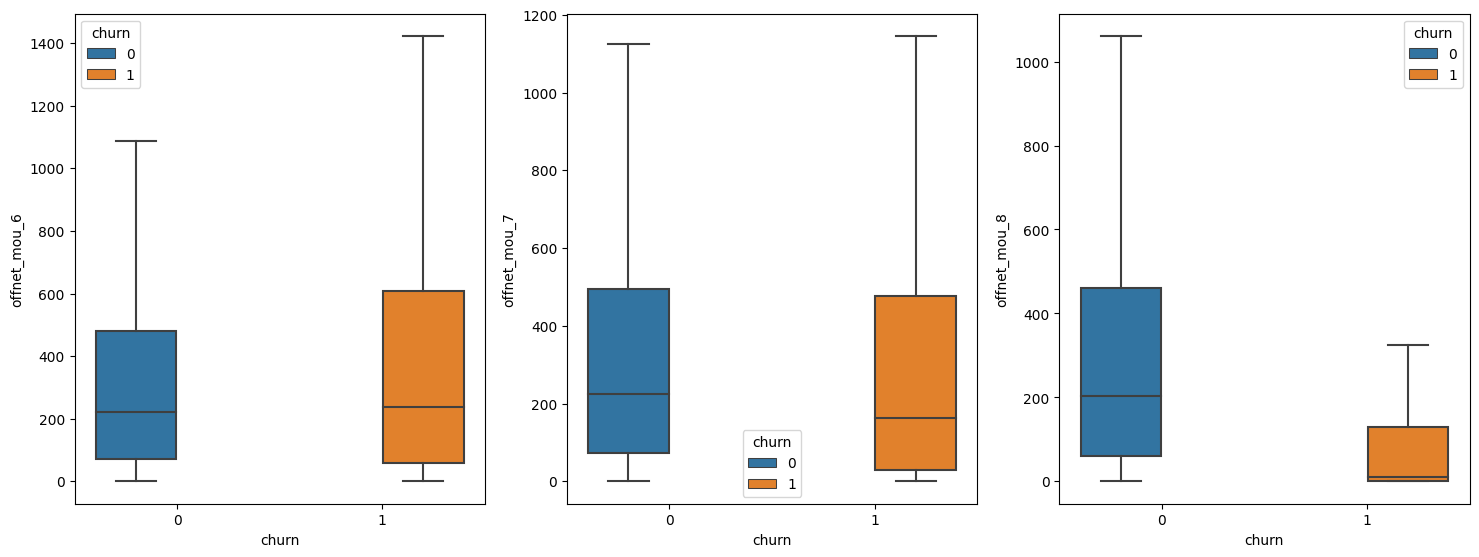

In [68]:
# Plotting offnet_mou
plot_box_chart('offnet_mou')

# Outcome - As we can see the offnet_mou in the action phase has declined for the churned users

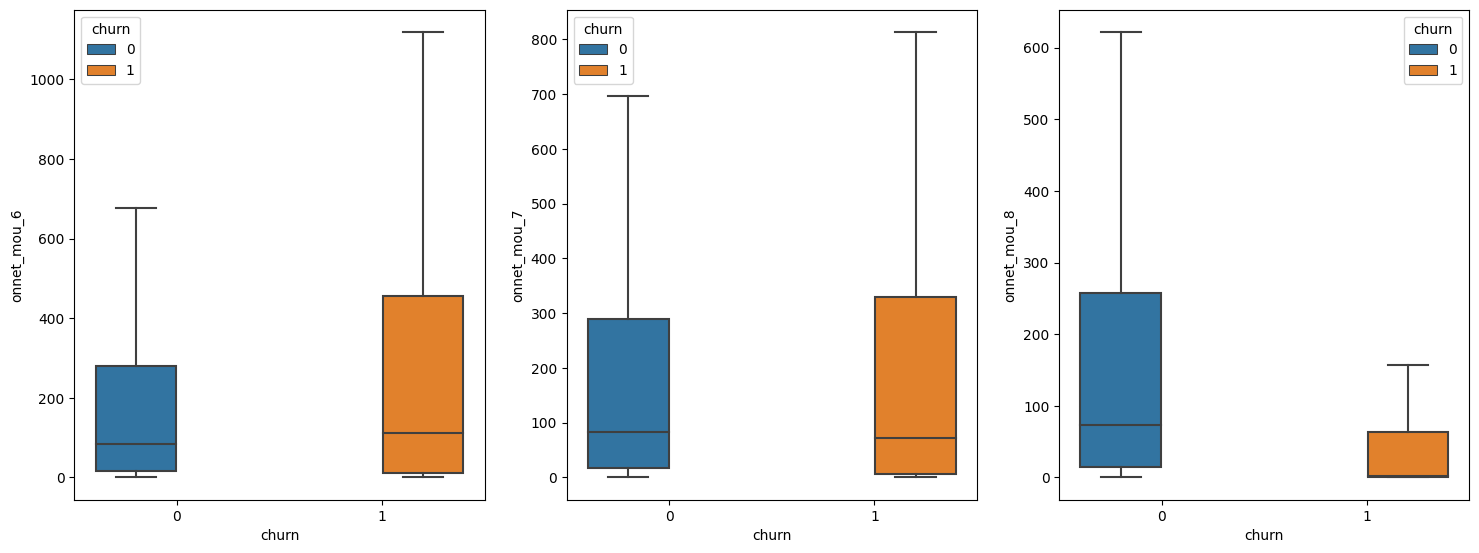

In [69]:
# Plotting onnet_mou
plot_box_chart('onnet_mou')

# Outcome - As we can see the onnet_mou in the action phase has declined for the churned users

# Univariate Analysis - Age on network

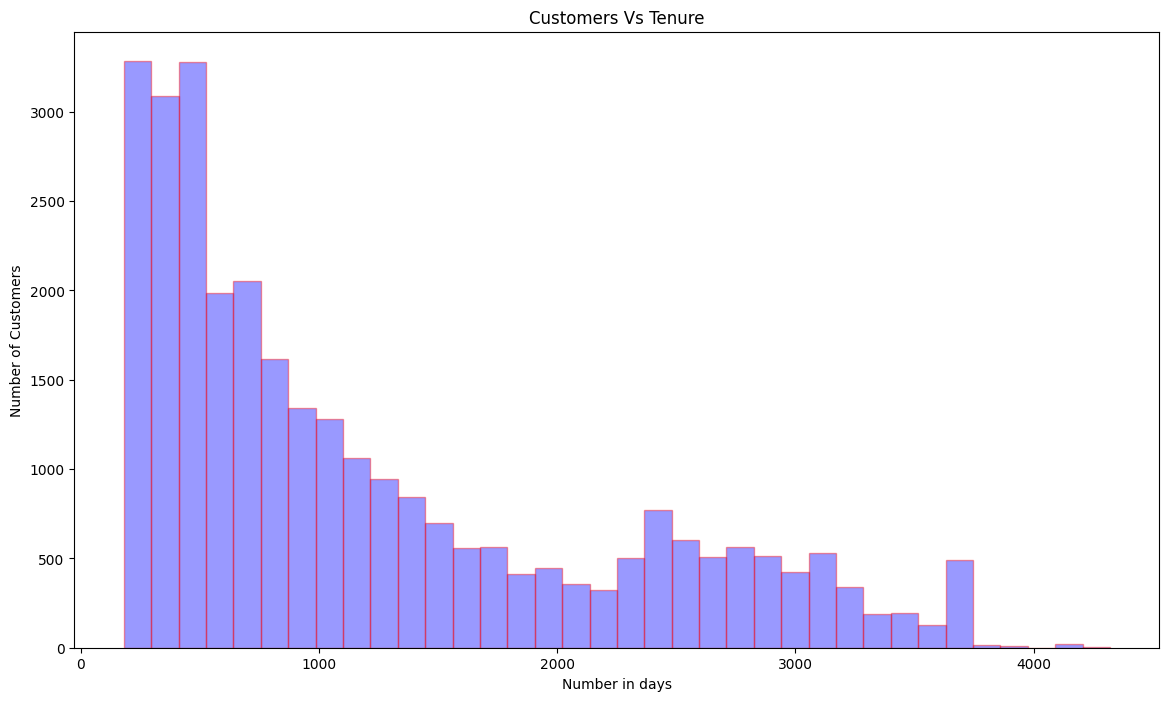

In [70]:
plt.figure(figsize=(14,8))
ax = sns.distplot(telecom_high_val_cust['aon'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 5})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Number in days')
ax.set_title('Customers Vs Tenure')
plt.show()

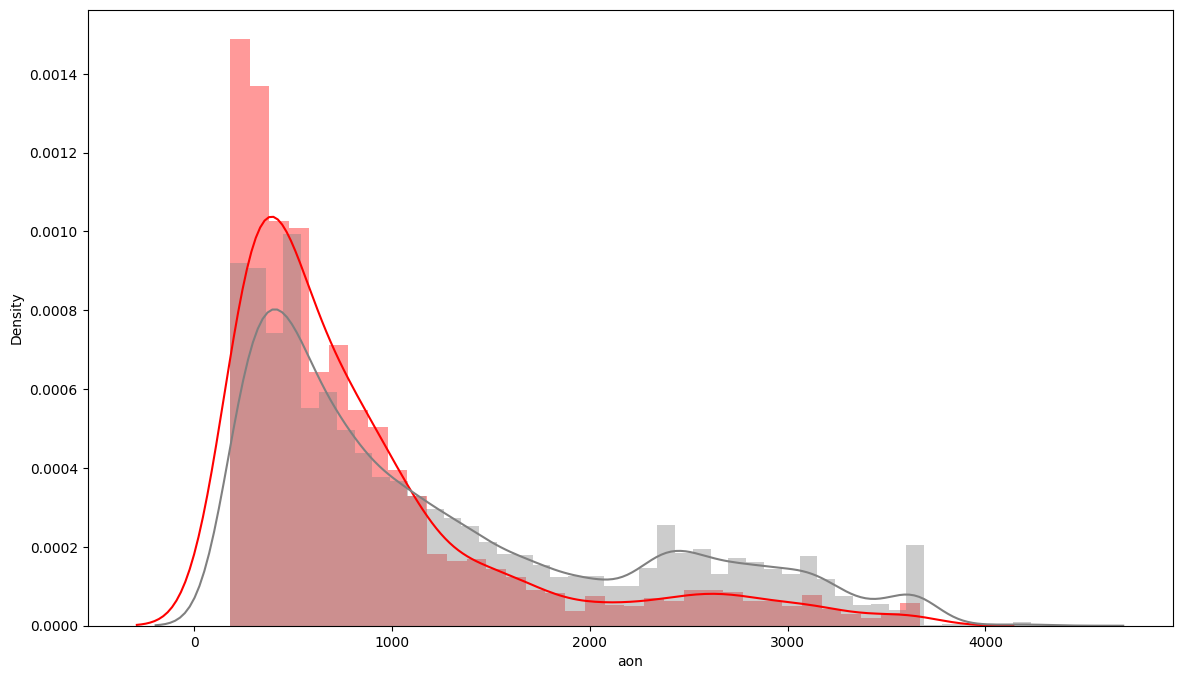

In [71]:
plt.figure(figsize=(14,8))
sns.distplot(telecom_high_val_cust[telecom_high_val_cust.churn==1]['aon'], hist=True, color = 'red')
sns.distplot(telecom_high_val_cust[telecom_high_val_cust.churn==0]['aon'], hist=True, color = 'grey')
plt.show()

# Handling Null values

In [72]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

day_of_last_rech_data_8          46.799987
fb_user_8                        46.799987
night_pck_user_8                 46.799987
fb_user_6                        44.112443
night_pck_user_6                 44.112443
day_of_last_rech_data_6          44.112443
day_of_last_rech_data_7          43.117551
night_pck_user_7                 43.117551
fb_user_7                        43.117551
og_others_8                       3.912797
ic_others_8                       3.912797
day_of_last_rech_8                1.943044
og_others_6                       1.809502
ic_others_6                       1.809502
ic_others_7                       1.789470
og_others_7                       1.789470
day_of_last_rech_7                0.327179
day_of_last_rech_6                0.243715
max_rech_amt_6                    0.000000
last_day_rch_amt_8                0.000000
total_rech_data_6                 0.000000
total_rech_data_7                 0.000000
last_day_rch_amt_7                0.000000
last_day_rc

In [73]:
# Get all columns with percentage of missing values greater than 40
# Print total number of columns with missing values greater than 40

null_greater_than_40 =  percentage_of_null_values[percentage_of_null_values > 40]
print(null_greater_than_40)
print('='*50)
print('Total count of columns - ', len(null_greater_than_40))

day_of_last_rech_data_8    46.799987
fb_user_8                  46.799987
night_pck_user_8           46.799987
fb_user_6                  44.112443
night_pck_user_6           44.112443
day_of_last_rech_data_6    44.112443
day_of_last_rech_data_7    43.117551
night_pck_user_7           43.117551
fb_user_7                  43.117551
dtype: float64
Total count of columns -  9


In [74]:
# null_greater_than_40.index.tolist() will give us all the columns names with missing value greater than 40
# Drop all columns where percentage of missing value is greater than 40
# inplace=True will drop these columns from the application dataframe
telecom_high_val_cust.drop(null_greater_than_40.index.tolist(), axis=1, inplace=True)
telecom_high_val_cust.shape

(29953, 132)

In [75]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = telecom_high_val_cust.isnull().sum()/len(telecom_high_val_cust.index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

# Get all columns with percentage of missing values greater than 0

null_greater_than_0 =  percentage_of_null_values[percentage_of_null_values > 0]
print(null_greater_than_0)
print('='*50)
print('Total count of columns - ', len(null_greater_than_0))

ic_others_8           3.912797
og_others_8           3.912797
day_of_last_rech_8    1.943044
og_others_6           1.809502
ic_others_6           1.809502
og_others_7           1.789470
ic_others_7           1.789470
day_of_last_rech_7    0.327179
day_of_last_rech_6    0.243715
dtype: float64
Total count of columns -  9


In [76]:
fillna_cols = ['ic_others_8', 'og_others_8', 'ic_others_6', 'og_others_7', 'og_others_6', 'ic_others_7']
telecom_high_val_cust[fillna_cols] = telecom_high_val_cust[fillna_cols].fillna(0)

In [77]:
# Imputing date columns with mode
telecom_high_val_cust['day_of_last_rech_8'] = telecom_high_val_cust['day_of_last_rech_8'].mode()[0]
telecom_high_val_cust['day_of_last_rech_7'] = telecom_high_val_cust['day_of_last_rech_7'].mode()[0]
telecom_high_val_cust['day_of_last_rech_6'] = telecom_high_val_cust['day_of_last_rech_6'].mode()[0]

In [78]:
telecom_high_val_cust.shape

(29953, 132)

# Model Metric

In [79]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]

    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )

    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)

    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)

    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)

    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

# PCA - Feature selection

In [80]:
from sklearn.decomposition import PCA

In [81]:
# Putting feature variable to X
X = telecom_high_val_cust.drop(['churn', 'mobile_number'], axis=1)

# Putting target variable to y
y = telecom_high_val_cust['churn']

In [82]:
# Ratio of classes
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.088


In [83]:
# Splitting the data into train and test
X_train_og, X_test, y_train_og, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [84]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resample, y_train_resample= smt.fit_resample(X_train_og, y_train_og)
y_train = y_train_resample

In [85]:
# Feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [86]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [87]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
cum_sum

array([0.10147573, 0.18507104, 0.24171235, 0.29026331, 0.33282309,
       0.36509202, 0.39470989, 0.42329404, 0.44886456, 0.47286783,
       0.49654318, 0.51754652, 0.53829288, 0.55831344, 0.576864  ,
       0.59347622, 0.60926639, 0.62485074, 0.63989955, 0.6544029 ,
       0.66814011, 0.68091686, 0.6932944 , 0.70474461, 0.714965  ,
       0.72493652, 0.73450392, 0.74374944, 0.75280091, 0.76148417,
       0.76990066, 0.77776684, 0.78548703, 0.79300384, 0.80042649,
       0.80769521, 0.81480635, 0.82166325, 0.82844336, 0.83507331,
       0.84156305, 0.84752691, 0.85338535, 0.85917764, 0.86482778,
       0.86991973, 0.87496695, 0.87961396, 0.88393291, 0.88815947,
       0.89223187, 0.89625767, 0.90010278, 0.9038809 , 0.90761404,
       0.91122677, 0.91479153, 0.91820354, 0.921467  , 0.9246859 ,
       0.92780307, 0.93075381, 0.93362883, 0.93641966, 0.93914519,
       0.94176542, 0.94430182, 0.94680669, 0.94923912, 0.95163527,
       0.95393037, 0.95622201, 0.95843102, 0.96054164, 0.96264

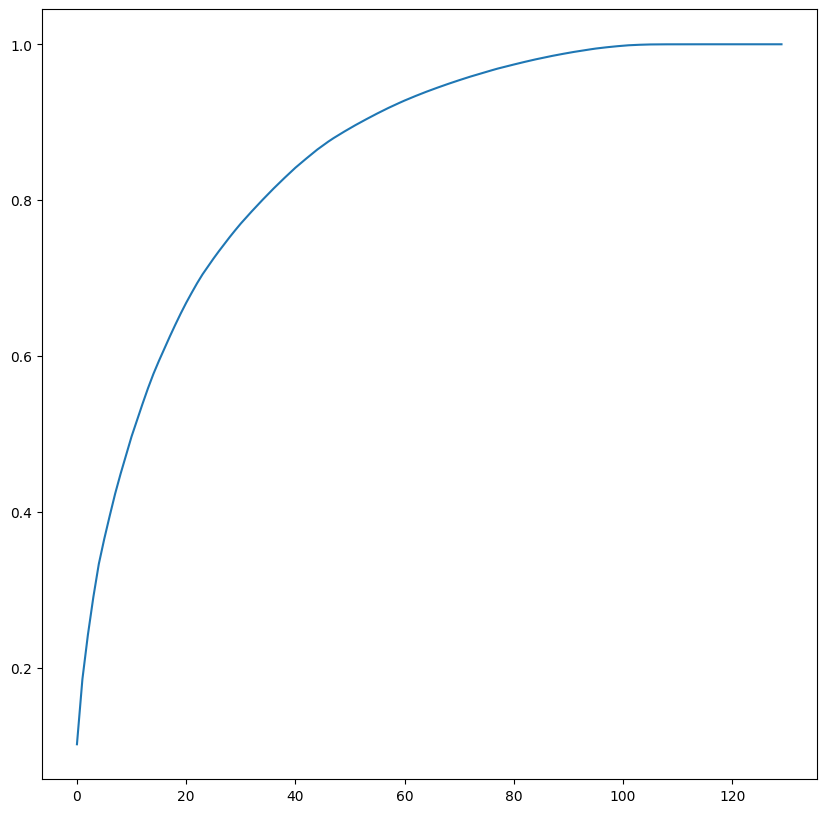

In [88]:
fig = plt.figure(figsize=[10,10])
plt.plot(cum_sum)
plt.show()

# PCA - Logistic Regression Model

In [89]:
# Perform PCA using the first 65 components
pca2 = PCA(n_components=65, random_state=42)
transformed_data = pca2.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,66)], index = X_train_resample.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,churn
0,2.757743,-1.085334,0.413596,2.837815,2.281049,4.974199,-2.693426,-1.200744,-3.915417,0.171067,1.106623,1.063033,0.278957,-0.868165,-0.217611,1.234675,0.689963,-0.954653,-1.259226,1.653678,0.344647,-2.387607,-0.277447,0.639141,0.350989,-1.582387,0.604487,-2.689625,-0.106846,1.457189,0.578180,0.123995,0.482239,0.789317,0.630754,0.328894,0.315955,-1.145461,-0.537187,1.303395,-0.436842,-0.234510,-1.055823,0.907594,-0.588160,-0.219292,-0.246725,1.696438,1.189450,0.192157,-0.518522,0.676017,-2.224453,-1.081139,-2.802713,1.166890,1.422715,-3.614852,-0.490856,-0.565124,0.583775,-1.819225,1.616185,-0.016753,0.520886,0
1,-0.567426,-2.407774,-1.121032,-0.185452,2.583634,-1.001936,1.781370,0.011371,0.114024,0.647839,0.659497,0.373967,0.926532,-0.311006,-1.085921,-0.019065,0.190677,1.334563,0.284980,1.012247,0.325512,0.708651,0.111055,-0.855900,0.123541,0.273446,0.418599,0.540562,-0.024274,-0.582153,-0.601025,0.111017,-0.291101,0.168962,-0.331784,0.597979,0.328688,0.764874,-0.241550,-0.644804,-0.567871,-0.338934,0.373739,0.350128,-0.077411,-0.078906,-0.052876,-0.639752,-1.198288,-0.077161,0.731208,0.266512,0.731630,0.875409,0.796747,0.557109,1.150723,-0.535267,0.595905,-0.398463,0.167039,0.643531,-0.169814,-0.247154,0.175607,0
2,-4.508650,1.391183,0.710401,-4.157980,0.160800,2.314384,-0.471030,0.259978,0.139123,-0.149547,-0.964318,-0.398792,0.489441,0.182318,0.019484,0.463270,0.132853,0.386201,-0.160035,0.229351,-2.652318,-0.066328,0.075264,-0.124895,-0.323783,0.491642,-0.141990,0.190279,-0.124516,0.061885,0.577440,-0.287185,-0.294098,-0.356405,-0.032412,0.315649,0.006778,-0.464282,0.430814,-0.343418,0.296942,-0.740063,-0.660606,0.007960,0.146553,0.516288,0.014667,-0.406671,0.138034,-0.240284,0.229509,0.400377,0.171271,0.060149,-0.039462,-0.054647,0.130699,0.061252,-0.428782,-0.497773,-0.700719,0.070115,-0.206277,-0.265754,-0.012731,0
3,4.528450,-1.966244,0.554057,-0.687428,-1.396951,-0.781781,-0.148658,-2.082119,1.236282,0.502177,-0.795196,0.380208,-0.553416,2.382985,-1.056337,-0.728355,0.910751,-0.481566,-0.764242,-1.568238,-0.460768,0.692256,-2.105501,0.478761,-0.015702,-0.027248,0.651595,-0.341994,-0.311702,0.244296,-0.173048,-0.756663,-0.857541,0.372783,0.487718,0.597889,0.057110,-0.238832,-0.119772,0.298713,-0.850656,-0.749802,-0.308632,0.729300,-0.509964,-0.459564,0.686713,-0.346891,-0.493535,0.003751,0.136772,0.037277,0.009745,0.190115,0.042077,0.430544,-0.348265,0.106373,-0.570285,0.911728,0.083150,-0.509019,-0.409486,-0.425581,0.151076,0
4,-2.718491,3.056745,-1.255728,-0.421001,1.064137,-0.513157,-3.938305,1.284647,1.893540,-0.590271,1.771856,-3.756205,6.171267,2.242199,1.465319,-0.576779,1.076588,-1.982186,0.019105,1.135639,2.424326,0.276485,0.306398,-1.310457,-0.345782,-0.645831,0.473151,-0.116713,-0.499720,0.519604,0.087663,-0.456488,0.285637,-0.935074,-0.897357,1.105639,0.447795,0.218405,-0.710213,0.513965,-1.163474,-0.335247,0.373660,-1.621314,0.560831,-1.834613,-0.683896,0.246108,-0.270019,0.935795,-1.053445,0.529940,-0.435659,1.552280,-0.651143,-0.079741,-0.341492,0.307284,-0.015234,-0.315100,2.338097,1.122622,0.001164,-1.128154,-0.345118,0


In [90]:
X_test_pca = pca2.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(random_state=42, class_weight='balanced')
pca_regression = regression.fit(X_train_pca, y_train)

In [92]:
# Predict probabilities
pred_probs_test = pca_regression.predict_proba(X_test_pca)

In [93]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_probs_test[:,1])

0.8814239780893806

In [94]:
# y_train predictions
y_train_pred_pca = pca_regression.predict(X_train_pca)

In [95]:
# y_test predictions
y_test_pred_pca = pca_regression.predict(X_test_pca)

In [96]:
# confusion matrix
train_matrix = confusion_matrix(y_train, y_train_pred_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.847
Sensitivity / True Positive Rate / Recall : 0.871
Specificity / True Negative Rate :  0.823
Precision / Positive Predictive Value : 0.831
F1-score : 0.851

Test Performance :

Accuracy : 0.814
Sensitivity / True Positive Rate / Recall : 0.803
Specificity / True Negative Rate :  0.815
Precision / Positive Predictive Value : 0.263
F1-score : 0.396


# Hyperparameter Tuning - GridSearchCV

In [97]:
# Creating a Logistic regression model using pca transformed train set

from sklearn.pipeline import Pipeline
logicstic_tuned = LogisticRegression(random_state=100, class_weight='balanced')

In [98]:
# We are using X_train_pca and y_train generated using PCA

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'],
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

search = GridSearchCV(cv=folds, estimator = logicstic_tuned, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [99]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.9201547981844026
Best Parameters : {'C': 5, 'penalty': 'l2'}


In [100]:
# Modelling using the best LR-PCA estimator
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)

In [101]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)

In [102]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.847
Sensitivity / True Positive Rate / Recall : 0.871
Specificity / True Negative Rate :  0.823
Precision / Positive Predictive Value : 0.831
F1-score : 0.851

Test Performance :

Accuracy : 0.814
Sensitivity / True Positive Rate / Recall : 0.803
Specificity / True Negative Rate :  0.815
Precision / Positive Predictive Value : 0.263
F1-score : 0.396


# PCA - Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08122725603445398,
                                     1: 0.918772743965546},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [104]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [10, 20, 30],
    'max_depth' : [3,45,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params,
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08122725603445398,
                                                            1: 0.918772743965546},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 45, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc', verbose=True)

In [105]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.9638888319882857
Best Parameters : {'max_depth': 45, 'min_samples_leaf': 15, 'n_estimators': 30}


In [106]:
# Modelling using the best PCA-RandomForest Estimator
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.2s finished


In [107]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [108]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.883
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.767
Precision / Positive Predictive Value : 0.811
F1-score : 0.896

Test Performance :

Accuracy : 0.726
Sensitivity / True Positive Rate / Recall : 0.875
Specificity / True Negative Rate :  0.714
Precision / Positive Predictive Value : 0.201
F1-score : 0.327


In [109]:
# Modelling using the best PCA-RandomForest Estimator
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


In [110]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [111]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.883
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.767
Precision / Positive Predictive Value : 0.811
F1-score : 0.896

Test Performance :

Accuracy : 0.726
Sensitivity / True Positive Rate / Recall : 0.875
Specificity / True Negative Rate :  0.714
Precision / Positive Predictive Value : 0.201
F1-score : 0.327


# PCA - XGBoost

In [112]:
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist',
                                   objective='binary:logistic')  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [113]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

Baseline Train AUC Score


0.998974732218228

In [114]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

Baseline Test AUC Score


0.8728132036589602

In [115]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [10, 20, 30]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [25, 50],
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [116]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.9400215860333041
Best Parameters : {'gamma': 10, 'learning_rate': 0.3, 'max_depth': 4, 'min_child_weight': 25, 'n_estimators': 30}


In [117]:
# Modelling using the best PCA-XGBoost Estimator
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)

In [118]:
# Prediction on test set
X_test_pca = pca2.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)

In [119]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.769
Sensitivity / True Positive Rate / Recall : 0.996
Specificity / True Negative Rate :  0.542
Precision / Positive Predictive Value : 0.685
F1-score : 0.812

Test Performance :

Accuracy : 0.553
Sensitivity / True Positive Rate / Recall : 0.935
Specificity / True Negative Rate :  0.522
Precision / Positive Predictive Value : 0.138
F1-score : 0.241


In [120]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

Train AUC Score
0.9483513745908647
Test AUC Score
0.8740078381032956


# Interpretable Model - Baseline

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform train set
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_resampled.index, columns=X_train_resampled.columns)

# Transform test set
X_test_scaled = scaler.transform(X_test)

# summary statistics of standardized variables
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [122]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train_scaled, y_train_resampled)

y_train_pred = baseline_model.predict_proba(X_train_scaled)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [123]:
y_train_pred = pd.Series(y_train_pred,index = X_train_scaled.index ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [124]:
# Prediction at threshold of 0.5
classification_threshold = 0.5

y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [125]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train_resampled, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[17684  1588]
 [ 1643 17629]]

Confusion Matrix for test: 
 [[7585  663]
 [ 239  499]]


In [126]:
# Baseline Model Performance :

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.916
Sensitivity / True Positive Rate / Recall : 0.915
Specificity / True Negative Rate :  0.918
Precision / Positive Predictive Value : 0.917
F1-score : 0.916


Test Performance : 

Accuracy : 0.9
Sensitivity / True Positive Rate / Recall : 0.676
Specificity / True Negative Rate :  0.92
Precision / Positive Predictive Value : 0.429
F1-score : 0.525


In [127]:
# Specificity / Sensitivity Tradeoff

# Classification at probability thresholds between 0 and 1
y_train_pred_thres = pd.DataFrame(index=X_train_scaled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh :
        return 1
    else :
        return 0


for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [128]:
# sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) :
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)

    metrics_df =  metrics_df.append({
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)

metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.984,0.638,0.811
0.2,0.969,0.756,0.863
0.3,0.953,0.829,0.891
0.4,0.938,0.881,0.910
0.5,0.915,0.918,0.916
0.6,0.883,0.945,0.914
0.7,0.844,0.963,0.903
0.8,0.776,0.979,0.878
0.9,0.610,0.993,0.801


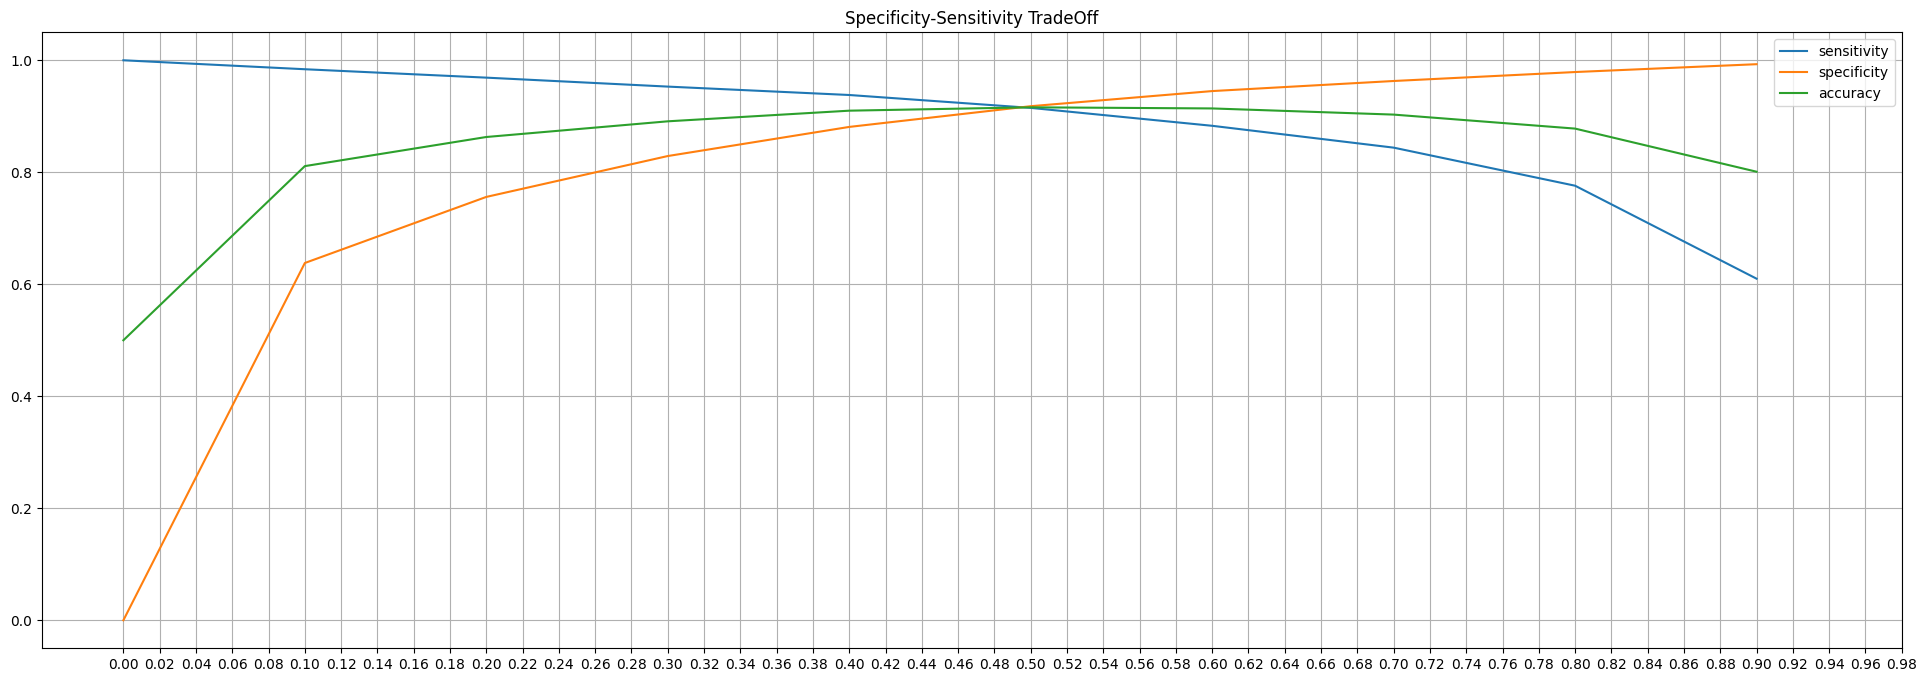

In [129]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02), title='Specificity-Sensitivity TradeOff');

In [130]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[17629  1643]
 [ 1586 17686]]

Confusion Matrix for test: 
 [[7567  681]
 [ 233  505]]


In [131]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.916
Sensitivity / True Positive Rate / Recall : 0.918
Specificity / True Negative Rate :  0.915
Precision / Positive Predictive Value : 0.915
F1-score : 0.916


Test Performance : 

Accuracy : 0.898
Sensitivity / True Positive Rate / Recall : 0.684
Specificity / True Negative Rate :  0.917
Precision / Positive Predictive Value : 0.426
F1-score : 0.525


In [132]:
# ROC_AUC score
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.971 

ROC AUC score for Test :  0.883


# Interpretable Model - Feature selection using RFE

In [133]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train_scaled,y_train_resampled)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,

In [134]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_,
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
111,sachet_2g_7,1,True
115,monthly_3g_8,1,True
113,monthly_3g_6,1,True
112,sachet_2g_8,1,True
118,sachet_3g_8,1,True
110,sachet_2g_6,1,True
73,total_ic_mou_8,1,True
116,sachet_3g_6,1,True
109,monthly_2g_8,1,True
108,monthly_2g_7,1,True


In [135]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['sachet_2g_7',
 'monthly_3g_8',
 'monthly_3g_6',
 'sachet_2g_8',
 'sachet_3g_8',
 'sachet_2g_6',
 'total_ic_mou_8',
 'sachet_3g_6',
 'monthly_2g_8',
 'monthly_2g_7',
 'monthly_3g_7',
 'total_rech_data_6',
 'total_rech_data_8',
 'total_rech_data_7',
 'sachet_3g_7']

In [136]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_scaled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38528
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10570.
Date:                Tue, 08 Aug 2023   Deviance:                       21139.
Time:                        17:14:50   Pearson chi2:                 1.65e+12
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5674
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.622e+04   1.33e+05      0.573      0.566   -1.84e+05    3.37e+05
sachet_2g_7       -1.249e+06   2.32e+06     -0.538      0.591    -5.8e+06     3.3e+06
monthly_3g_8      -8143.6017   5.73e+05     -0.014      0.989   -1.13e+06    1.12e+06
monthly_3g_6         -0.5530      0.040    -13.771      0.000      -0.632      -0.474
sachet_2g_8        -3.27e+04    2.3e+06     -0.014      0.989   -4.55e+06    4.48e+06
sachet_3g_8       -1.491e+04   1.05e+06     -0.014      0.989   -2.07e+06    2.04e+06
sachet_2g_6          -2.5189      0.139    -18.096      0.000      -2.792      -2.246
total_ic_mou_8       -2.9924      0.054    -55.616      0.000      -3.098      -2.887
sachet_3g_6          -1.0074      0.065    -15.555      0.000      -1.134      -0.880
monthly_2g_8      -5185.4925   3.65e+05     -0.014      0.989   -7.21e+05     7.1e+05
monthly_2g_7      -1.797e+05   3.34e+05     -0.538      0.591   -8.35e+05    4.75e+05
monthly_3g_7      -2.787e+05   5.18e+05     -0.538      0.591   -1.29e+06    7.37e+05
total_rech_data_6     2.8936      0.156     18.573      0.000       2.588       3.199
total_rech_data_8  4.034e+04   2.84e+06      0.014      0.989   -5.53e+06    5.61e+06
total_rech_data_7  1.514e+06   2.81e+06      0.538      0.591      -4e+06    7.03e+06
sachet_3g_7       -5.879e+05   1.09e+06     -0.538      0.591   -2.73e+06    1.55e+06
=====================================================================================
"""

# Interpretable Model 1 - Manual Feature

In [137]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train, logr_fit, selected_columns) :
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_scaled[selected_columns].values, i) for i in range(X_train_scaled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_scaled, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
total_rech_data_8,129.21,0.9887
total_rech_data_7,97.64,0.5906
sachet_2g_8,86.21,0.9887
sachet_2g_7,71.41,0.5906
total_rech_data_6,41.21,0.0000
sachet_2g_6,32.91,0.0000
sachet_3g_8,19.31,0.9887
sachet_3g_7,18.51,0.5906
sachet_3g_6,7.29,0.0000


In [138]:
# total_rech_data_8 have verify high VIF

selected_columns = rfe_selected_columns
selected_columns.remove('total_rech_data_8')
selected_columns

['sachet_2g_7',
 'monthly_3g_8',
 'monthly_3g_6',
 'sachet_2g_8',
 'sachet_3g_8',
 'sachet_2g_6',
 'total_ic_mou_8',
 'sachet_3g_6',
 'monthly_2g_8',
 'monthly_2g_7',
 'monthly_3g_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'sachet_3g_7']

# Interpretable Model 2 - Manual Feature

In [139]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_scaled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38529
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11599.
Date:                Tue, 08 Aug 2023   Deviance:                       23199.
Time:                        17:14:54   Pearson chi2:                 1.72e+11
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5436
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.476e+04   1.29e+05      0.578      0.563   -1.79e+05    3.28e+05
sachet_2g_7       -1.245e+06   2.15e+06     -0.578      0.563   -5.46e+06    2.97e+06
monthly_3g_8         -0.6645      0.036    -18.262      0.000      -0.736      -0.593
monthly_3g_6         -0.6209      0.038    -16.373      0.000      -0.695      -0.547
sachet_2g_8          -1.3074      0.061    -21.487      0.000      -1.427      -1.188
sachet_3g_8          -0.6814      0.076     -8.912      0.000      -0.831      -0.532
sachet_2g_6          -2.8858      0.134    -21.510      0.000      -3.149      -2.623
total_ic_mou_8       -2.7635      0.048    -57.237      0.000      -2.858      -2.669
sachet_3g_6          -1.1811      0.063    -18.678      0.000      -1.305      -1.057
monthly_2g_8         -0.9627      0.047    -20.386      0.000      -1.055      -0.870
monthly_2g_7       -1.79e+05    3.1e+05     -0.578      0.563   -7.86e+05    4.28e+05
monthly_3g_7      -2.777e+05    4.8e+05     -0.578      0.563   -1.22e+06    6.63e+05
total_rech_data_6     3.3376      0.151     22.167      0.000       3.043       3.633
total_rech_data_7  1.508e+06   2.61e+06      0.578      0.563    -3.6e+06    6.62e+06
sachet_3g_7       -5.857e+05   1.01e+06     -0.578      0.563   -2.57e+06     1.4e+06
=====================================================================================
"""

In [140]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
total_rech_data_7,86.21,0.563
sachet_2g_7,64.19,0.563
total_rech_data_6,40.91,0.000
sachet_2g_6,32.68,0.000
sachet_3g_7,16.96,0.563
sachet_3g_6,7.25,0.000
monthly_3g_7,4.93,0.563
monthly_3g_6,3.03,0.000
monthly_2g_7,2.51,0.563


In [141]:
# total_rech_data_8 have verify high VIF

selected_columns = rfe_selected_columns
selected_columns.remove('total_rech_data_7')
selected_columns

['sachet_2g_7',
 'monthly_3g_8',
 'monthly_3g_6',
 'sachet_2g_8',
 'sachet_3g_8',
 'sachet_2g_6',
 'total_ic_mou_8',
 'sachet_3g_6',
 'monthly_2g_8',
 'monthly_2g_7',
 'monthly_3g_7',
 'total_rech_data_6',
 'sachet_3g_7']

# Interpretable Model 3 - Manual Feature

In [142]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_scaled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38530
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15494.
Date:                Tue, 08 Aug 2023   Deviance:                       30989.
Time:                        17:14:55   Pearson chi2:                 2.74e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4414
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5986      0.019    -31.050      0.000      -0.636      -0.561
sachet_2g_7           0.0291      0.025      1.142      0.254      -0.021       0.079
monthly_3g_8         -0.7208      0.028    -25.301      0.000      -0.777      -0.665
monthly_3g_6         -1.2471      0.033    -37.771      0.000      -1.312      -1.182
sachet_2g_8          -1.0602      0.035    -30.332      0.000      -1.129      -0.992
sachet_3g_8          -0.2796      0.034     -8.294      0.000      -0.346      -0.214
sachet_2g_6          -5.7519      0.122    -47.072      0.000      -5.991      -5.512
total_ic_mou_8       -2.1243      0.034    -63.022      0.000      -2.190      -2.058
sachet_3g_6          -2.3449      0.055    -42.853      0.000      -2.452      -2.238
monthly_2g_8         -1.2474      0.039    -31.869      0.000      -1.324      -1.171
monthly_2g_7         -0.8635      0.028    -30.640      0.000      -0.919      -0.808
monthly_3g_7         -0.1235      0.023     -5.457      0.000      -0.168      -0.079
total_rech_data_6     6.7247      0.139     48.366      0.000       6.452       6.997
sachet_3g_7           0.1249      0.029      4.270      0.000       0.068       0.182
=====================================================================================
"""

In [143]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

,VIF,P-value
Features,,
total_rech_data_6,35.81,0.0000
sachet_2g_6,29.15,0.0000
sachet_3g_6,6.67,0.0000
sachet_3g_7,3.09,0.0000
monthly_3g_6,2.88,0.0000
sachet_2g_7,2.49,0.2536
monthly_3g_7,1.91,0.0000
sachet_2g_8,1.86,0.0000
sachet_3g_8,1.77,0.0000


In [144]:
# total_rech_data_8 have verify high VIF

selected_columns = rfe_selected_columns
selected_columns.remove('total_rech_data_6')
selected_columns

['sachet_2g_7',
 'monthly_3g_8',
 'monthly_3g_6',
 'sachet_2g_8',
 'sachet_3g_8',
 'sachet_2g_6',
 'total_ic_mou_8',
 'sachet_3g_6',
 'monthly_2g_8',
 'monthly_2g_7',
 'monthly_3g_7',
 'sachet_3g_7']

# Interpretable Model 4 - Manual Feature

In [145]:
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_scaled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38531
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17252.
Date:                Tue, 08 Aug 2023   Deviance:                       34505.
Time:                        17:14:56   Pearson chi2:                 7.49e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6247      0.018    -34.949      0.000      -0.660      -0.590
sachet_2g_7        0.0476      0.023      2.076      0.038       0.003       0.092
monthly_3g_8      -0.6585      0.026    -24.923      0.000      -0.710      -0.607
monthly_3g_6       0.0237      0.019      1.265      0.206      -0.013       0.060
sachet_2g_8       -1.0818      0.032    -33.556      0.000      -1.145      -1.019
sachet_3g_8       -0.3034      0.032     -9.587      0.000      -0.365      -0.241
sachet_2g_6        0.0978      0.020      4.856      0.000       0.058       0.137
total_ic_mou_8    -2.1459      0.032    -66.045      0.000      -2.210      -2.082
sachet_3g_6       -0.0101      0.023     -0.431      0.667      -0.056       0.036
monthly_2g_8      -0.7562      0.031    -24.170      0.000      -0.818      -0.695
monthly_2g_7      -0.4562      0.022    -20.806      0.000      -0.499      -0.413
monthly_3g_7      -0.1241      0.021     -5.832      0.000      -0.166      -0.082
sachet_3g_7        0.1556      0.027      5.733      0.000       0.102       0.209
==================================================================================
"""

In [146]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_7,3.09,0.0000
sachet_2g_7,2.49,0.0379
sachet_3g_6,2.40,0.6668
monthly_3g_7,1.91,0.0000
sachet_2g_6,1.86,0.0000
sachet_2g_8,1.85,0.0000
monthly_3g_8,1.76,0.0000
sachet_3g_8,1.76,0.0000
monthly_3g_6,1.60,0.2058


In [147]:
# total_rech_data_8 have verify high VIF

selected_columns = rfe_selected_columns
selected_columns.remove('sachet_3g_7')
selected_columns

['sachet_2g_7',
 'monthly_3g_8',
 'monthly_3g_6',
 'sachet_2g_8',
 'sachet_3g_8',
 'sachet_2g_6',
 'total_ic_mou_8',
 'sachet_3g_6',
 'monthly_2g_8',
 'monthly_2g_7',
 'monthly_3g_7']

# Interpretable Model 5 - Manual Feature

In [148]:
logr5 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_scaled[selected_columns])), family = sm.families.Binomial())
logr5_fit = logr5.fit()
logr5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38532
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17270.
Date:                Tue, 08 Aug 2023   Deviance:                       34539.
Time:                        17:14:56   Pearson chi2:                 7.86e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6225      0.018    -34.876      0.000      -0.658      -0.588
sachet_2g_7        0.0687      0.023      3.046      0.002       0.024       0.113
monthly_3g_8      -0.6607      0.026    -25.021      0.000      -0.712      -0.609
monthly_3g_6       0.0256      0.019      1.373      0.170      -0.011       0.062
sachet_2g_8       -1.0894      0.032    -33.866      0.000      -1.152      -1.026
sachet_3g_8       -0.2184      0.026     -8.267      0.000      -0.270      -0.167
sachet_2g_6        0.0850      0.020      4.261      0.000       0.046       0.124
total_ic_mou_8    -2.1460      0.032    -66.084      0.000      -2.210      -2.082
sachet_3g_6        0.0725      0.018      3.943      0.000       0.036       0.109
monthly_2g_8      -0.7554      0.031    -24.143      0.000      -0.817      -0.694
monthly_2g_7      -0.4566      0.022    -20.844      0.000      -0.500      -0.414
monthly_3g_7      -0.1237      0.021     -5.825      0.000      -0.165      -0.082
==================================================================================
"""

In [149]:
# vif and p-values
vif(X_train_resampled, logr5_fit, selected_columns)

,VIF,P-value
Features,,
sachet_2g_7,2.41,0.0023
monthly_3g_7,1.91,0.0000
sachet_2g_8,1.84,0.0000
sachet_2g_6,1.83,0.0000
monthly_3g_8,1.76,0.0000
monthly_3g_6,1.60,0.1697
monthly_2g_7,1.47,0.0000
monthly_2g_8,1.46,0.0000
sachet_3g_8,1.38,0.0000


In [150]:
# total_rech_data_8 have verify high VIF

selected_columns = rfe_selected_columns
selected_columns.remove('monthly_3g_6')
selected_columns

['sachet_2g_7',
 'monthly_3g_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'sachet_2g_6',
 'total_ic_mou_8',
 'sachet_3g_6',
 'monthly_2g_8',
 'monthly_2g_7',
 'monthly_3g_7']

# Interpretable Model 6 - Manual Feature

In [151]:
logr6 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_scaled[selected_columns])), family = sm.families.Binomial())
logr6_fit = logr6.fit()
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38533
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17271.
Date:                Tue, 08 Aug 2023   Deviance:                       34541.
Time:                        17:14:57   Pearson chi2:                 7.81e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6226      0.018    -34.880      0.000      -0.658      -0.588
sachet_2g_7        0.0681      0.023      3.017      0.003       0.024       0.112
monthly_3g_8      -0.6508      0.025    -25.701      0.000      -0.700      -0.601
sachet_2g_8       -1.0894      0.032    -33.866      0.000      -1.153      -1.026
sachet_3g_8       -0.2189      0.026     -8.280      0.000      -0.271      -0.167
sachet_2g_6        0.0842      0.020      4.223      0.000       0.045       0.123
total_ic_mou_8    -2.1487      0.032    -66.249      0.000      -2.212      -2.085
sachet_3g_6        0.0731      0.018      3.982      0.000       0.037       0.109
monthly_2g_8      -0.7549      0.031    -24.130      0.000      -0.816      -0.694
monthly_2g_7      -0.4569      0.022    -20.855      0.000      -0.500      -0.414
monthly_3g_7      -0.1122      0.019     -5.758      0.000      -0.150      -0.074
==================================================================================
"""

In [152]:
# vif and p-values
vif(X_train_resampled, logr5_fit, selected_columns)

,VIF,P-value
Features,,
sachet_2g_7,2.41,0.0023
sachet_2g_8,1.84,0.0000
sachet_2g_6,1.83,0.0000
monthly_3g_8,1.65,0.0000
monthly_3g_7,1.65,0.0000
monthly_2g_7,1.47,0.0000
monthly_2g_8,1.46,0.0000
sachet_3g_8,1.38,0.0000
sachet_3g_6,1.32,0.0001


# Interpretable Final Model

In [153]:
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38544
Model:                            GLM   Df Residuals:                    38533
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17271.
Date:                Tue, 08 Aug 2023   Deviance:                       34541.
Time:                        17:14:58   Pearson chi2:                 7.81e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6226      0.018    -34.880      0.000      -0.658      -0.588
sachet_2g_7        0.0681      0.023      3.017      0.003       0.024       0.112
monthly_3g_8      -0.6508      0.025    -25.701      0.000      -0.700      -0.601
sachet_2g_8       -1.0894      0.032    -33.866      0.000      -1.153      -1.026
sachet_3g_8       -0.2189      0.026     -8.280      0.000      -0.271      -0.167
sachet_2g_6        0.0842      0.020      4.223      0.000       0.045       0.123
total_ic_mou_8    -2.1487      0.032    -66.249      0.000      -2.212      -2.085
sachet_3g_6        0.0731      0.018      3.982      0.000       0.037       0.109
monthly_2g_8      -0.7549      0.031    -24.130      0.000      -0.816      -0.694
monthly_2g_7      -0.4569      0.022    -20.855      0.000      -0.500      -0.414
monthly_3g_7      -0.1122      0.019     -5.758      0.000      -0.150      -0.074
==================================================================================
"""

In [154]:
# Prediction
y_train_pred_lr = logr6_fit.predict(sm.add_constant(X_train_scaled[selected_columns]))
y_train_pred_lr.head()

0    0.446285
1    0.758907
2    0.003952
3    0.818745
4    0.480092
dtype: float64

In [155]:
y_test_pred_lr = logr6_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

73764    0.202180
18280    0.003641
43793    0.586937
69530    0.199140
71555    0.079459
dtype: float64

# Interpretable Model - performance

In [156]:
# Specificity / Sensitivity Tradeoff

# Classification at probability thresholds between 0 and 1
y_train_pred_thres = pd.DataFrame(index=X_train_scaled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh :
        return 1
    else :
        return 0


for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,1,1,1,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,0,0,0,0,0


In [157]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) :
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)

logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.972,0.406,0.689
0.2,0.952,0.511,0.732
0.3,0.929,0.587,0.758
0.4,0.908,0.656,0.782
0.5,0.873,0.731,0.802
0.6,0.821,0.799,0.810
0.7,0.744,0.874,0.809
0.8,0.542,0.965,0.753
0.9,0.004,1.000,0.502


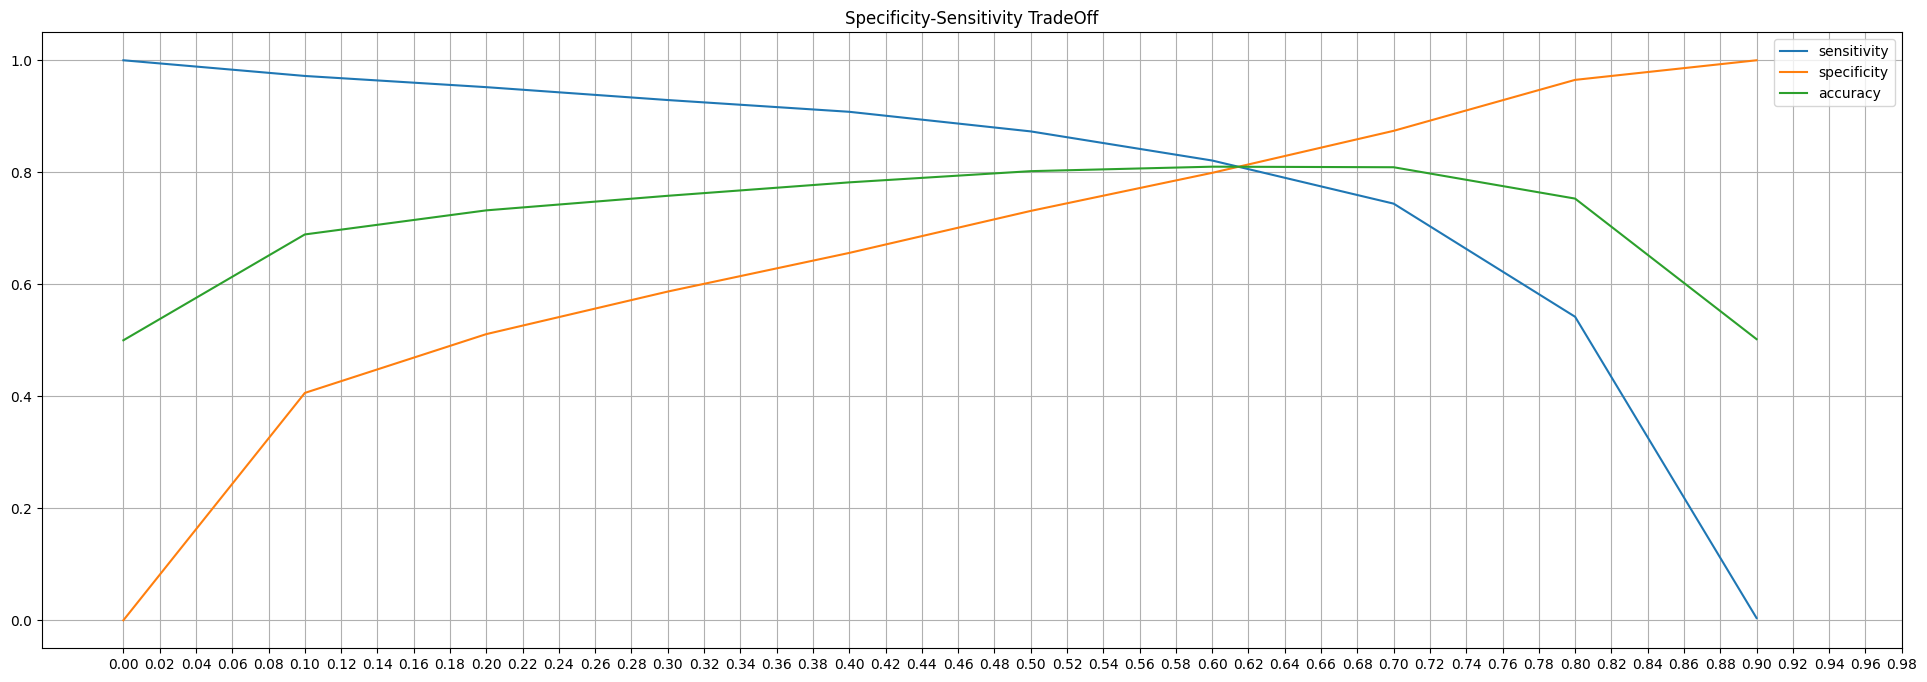

In [158]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [159]:
optimum_cutoff = 0.61
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15534  3738]
 [ 3589 15683]]

Confusion Matrix for test: 
 [[6705 1543]
 [ 187  551]]


In [160]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.81
Sensitivity / True Positive Rate / Recall : 0.814
Specificity / True Negative Rate :  0.806
Precision / Positive Predictive Value : 0.808
F1-score : 0.811


Test Performance : 

Accuracy : 0.807
Sensitivity / True Positive Rate / Recall : 0.747
Specificity / True Negative Rate :  0.813
Precision / Positive Predictive Value : 0.263
F1-score : 0.389


In [161]:
# ROC_AUC score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.893 

ROC AUC score for Test :  0.873


In [162]:
lr_summary_html = logr6_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



total_ic_mou_8   -2.1487
sachet_2g_8      -1.0894
monthly_2g_8     -0.7549
monthly_3g_8     -0.6508
const            -0.6226
monthly_2g_7     -0.4569
sachet_3g_8      -0.2189
monthly_3g_7     -0.1122
sachet_2g_6       0.0842
sachet_3g_6       0.0731
sachet_2g_7       0.0681
Name: coef, dtype: float64

# Interpretable Model - Randomforest

In [163]:
from sklearn.metrics import accuracy_score

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print('***' * 30)
    model_metrics(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    print('***' * 30)
    model_metrics(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [164]:
df_random_forest = telecom_high_val_cust.select_dtypes(include=["float64", "int64", "float32", "int32"])

In [165]:
# Splitting the data into X and y
X = df_random_forest.drop("churn", axis=1)
y = df_random_forest["churn"]

In [166]:
# Splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20967, 131), (8986, 131), (20967,), (8986,))

In [167]:
# Since we have an imbalanced dataset we use the class_weight parameter
rf = RandomForestClassifier(
    class_weight={0:0.05, 1: 0.95}, # 5% weightage to not-churn and 95% weightage to churn
    n_jobs = -1, # To utilize all the cores for processing
    random_state=42 # For replicating the same result
)

# hyperparams grid
hyper_params = {
    "n_estimators": [15, 20],
    "max_depth": [15, 20],
    "min_samples_split": [100, 200],
    "min_samples_leaf": [100, 200]
}

# creating hyperfolds
hyper_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# creating gridsearch model for finding the best suit of hyperparams
grid_search = GridSearchCV(
    estimator=rf,
    cv=hyper_folds,
    param_grid=hyper_params,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

In [168]:
# Fitting the random forest
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.05, 1: 0.95},
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [100, 200],
                         'n_estimators': [15, 20]},
             scoring='recall', verbose=1)

In [169]:
# Get the best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.05, 1: 0.95}, max_depth=15,
                       min_samples_leaf=200, min_samples_split=100,
                       n_estimators=15, n_jobs=-1, random_state=42)

In [170]:
evaluate_model(rf_best)

Train Accuracy : 0.8401774216626127
Train Confusion Matrix:
[[16118  3154]
 [  197  1498]]
******************************************************************************************
Accuracy : 0.84
Sensitivity / True Positive Rate / Recall : 0.884
Specificity / True Negative Rate :  0.836
Precision / Positive Predictive Value : 0.322
F1-score : 0.472
--------------------------------------------------
Test Accuracy : 0.8462052081014912
Test Confusion Matrix:
[[6941 1307]
 [  75  663]]
******************************************************************************************
Accuracy : 0.846
Sensitivity / True Positive Rate / Recall : 0.898
Specificity / True Negative Rate :  0.842
Precision / Positive Predictive Value : 0.337
F1-score : 0.49


In [171]:
# Creating a new random forest classifier from the best observed hyperparameters
rf_model = RandomForestClassifier(
    class_weight={0: 0.05, 1: 0.95}, max_depth=15,
                       min_samples_leaf=200, min_samples_split=100,
                       n_estimators=15, n_jobs=-1, random_state=42
)

In [172]:
# Fitting the random forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.05, 1: 0.95}, max_depth=15,
                       min_samples_leaf=200, min_samples_split=100,
                       n_estimators=15, n_jobs=-1, random_state=42)

In [173]:
# Evaluate the model
evaluate_model(rf_model)

Train Accuracy : 0.8365049840225116
Train Confusion Matrix:
[[16042  3230]
 [  198  1497]]
******************************************************************************************
Accuracy : 0.837
Sensitivity / True Positive Rate / Recall : 0.883
Specificity / True Negative Rate :  0.832
Precision / Positive Predictive Value : 0.317
F1-score : 0.467
--------------------------------------------------
Test Accuracy : 0.8341865123525484
Test Confusion Matrix:
[[6856 1392]
 [  98  640]]
******************************************************************************************
Accuracy : 0.834
Sensitivity / True Positive Rate / Recall : 0.867
Specificity / True Negative Rate :  0.831
Precision / Positive Predictive Value : 0.315
F1-score : 0.462


In [174]:
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_model.feature_importances_
})
(feature_importance.sort_values(by="importance", ascending=False)).head(20)

,feature,importance
53,loc_ic_t2t_mou_8,0.126115
74,total_ic_mou_8,0.107617
18,loc_og_t2t_mou_8,0.063952
15,roam_og_mou_8,0.058217
56,loc_ic_t2m_mou_8,0.052539
30,loc_og_mou_8,0.052141
21,loc_og_t2m_mou_8,0.043167
50,total_og_mou_8,0.042250
12,roam_ic_mou_8,0.041055
9,offnet_mou_8,0.031953


# Data pre-processing observations



> 1. Before pre-processing the number of columns having null values were 166
2. Total number of high-value customers observed = 29953
3. Class imbalance present in the dataset
4. Sanity Check
        No duplicate records present
        None of the amount columns contained negative values



# EDA - Summary



> 1. If the recharge amount is decreasing for three consecutive months the probability of churning is high
    - Columns: total_rech_amt, total_rech_amt_data, max_rech_amt
2. If the total number of recharges is decreasing then the customer is most likely to churn
    - Columns: total_rech_num
3. If the usage of mobile internet (2g/3g) is decreasing for the three consecutive months the probability of churning is high
    - Columns: vol_2g_mb, vol_3g_mb, monthly_2g, monthly_3g
4. If the purchase of service schemes that have validity lesser than a month is decreasing then the probability of churning is high
    - Columns: sachet_2g, sachet_3g
5. If the average revenue per user is decreasing for the three consecutive months the probability of churning is high
    - Columns: arpu
6. If the number of calls within the operator T network or outside the network is decreasing drastically in the action phase then it is an alarming sign of customers getting churned. On the other hand if the number of calls is increasing then the customer is not likely to churn.
    - Columns: onnet, offnet
7. The possibility of customers getting churned is high within the first 500 days (1.3 yrs). Post that, the probability of the customers getting churned was observed to decrease
    - Columns: aon



# Prominent Feature - Logistic Regression



1. total_ic_mou_8   -2.1487
2. sachet_2g_8      -1.0894
3. monthly_2g_8     -0.7549
4. monthly_3g_8     -0.6508
5. monthly_2g_7     -0.4569
6. sachet_3g_8      -0.2189
7. monthly_3g_7     -0.1122
8. sachet_2g_6       0.0842
9. sachet_3g_6       0.0731
10. sachet_2g_7       0.0681



# Prominent Feature - Randomforest


- minutes of usage both local and roaming,
- recharge amount of data
- incoming and outgoing from both same and other operators
- past recharge amounts
- internet usage
- number of recharges



# Recommendation



> Prioritize a superior customer experience by ensuring seamless calls, reducing call drops, and guaranteeing reliable network connectivity.

> Introduce value-added services like data and SMS packages, enticing special offers, and personalized discounts to enhance customer engagement.

> Engage with customers within their first 500 days of subscription to promptly address concerns and provide tailored solutions.

> Employ proactive communication to inform customers about service advantages and introduce customized data packs, SMS bundles, special offers, and actively gather their feedback for ongoing service improvements and creative new offerings.

> Create innovative service packages based on customers' previous recharge behavior, including voice, data, and extra features, while also implementing loyalty programs to offer exclusive perks and discounts, resulting in a customer-focused approach that minimizes churn, meets individual needs, and nurtures lasting connections











